# 박스오피스(극장)
- 데이터 기간 : 2015 ~ 2023
- 데이터 설명 : 일별 박스오피스 데이터(상업영화) + 영화 상세정보 merge

In [1]:
import pandas as pd
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 경로 설정

# 테스트
# plt.plot([1, 2, 3])
# plt.title("한글")
# plt.show()

In [2]:
df0 = pd.read_csv('../data/boxoffice_15_24_total.csv') # 전체
df1 = pd.read_csv('../data/boxoffice_y_15_24_total.csv') # 상업영화

# 중복되는 movieCd 코드 찾기
common_movieCds = set(df0['movieCd']).intersection(df1['movieCd'])

# 중복되는 movieCd 코드가 있는 경우 '상업영화' 열을 만들어 1로 표시
df0['commercial'] = df0['movieCd'].apply(lambda x: 1 if x in common_movieCds else 0)

In [3]:
df = df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34433 entries, 0 to 34432
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnum             34433 non-null  int64  
 1   rank             34433 non-null  int64  
 2   rankInten        34433 non-null  int64  
 3   rankOldAndNew    34433 non-null  object 
 4   movieCd          34433 non-null  object 
 5   movieNm          34433 non-null  object 
 6   openDt           34433 non-null  object 
 7   salesAmt         34433 non-null  int64  
 8   salesShare       34433 non-null  float64
 9   salesInten       34433 non-null  int64  
 10  salesChange      34433 non-null  float64
 11  salesAcc         34433 non-null  int64  
 12  audiCnt          34433 non-null  int64  
 13  audiInten        34433 non-null  int64  
 14  audiChange       34433 non-null  float64
 15  audiAcc          34433 non-null  int64  
 16  scrnCnt          34433 non-null  int64  
 17  showCnt     

In [5]:
df['current_date']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
34428    2024-03-31
34429    2024-03-31
34430    2024-03-31
34431    2024-03-31
34432    2024-03-31
Name: current_date, Length: 34433, dtype: object

## 1. 변수 타입 변환 & 시계열 지표 생성

- 시계열변수 > datetime으로 변환

In [6]:
df['openDt'] = df['openDt'].astype(str)# float를 object로 변환

In [7]:
df['openDt'] = pd.to_datetime(df['openDt'], errors='coerce')

In [8]:
df['current_date'] = pd.to_datetime(df['current_date'])

- days_since_opening(개봉 n일) 변수 생성

In [9]:
# datetime 형식으로 변환
df['current_date'] = pd.to_datetime(df['current_date'])
df['days_since_opening'] = df['current_date'] - df['openDt'] + pd.Timedelta(days=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34433 entries, 0 to 34432
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   rnum                34433 non-null  int64          
 1   rank                34433 non-null  int64          
 2   rankInten           34433 non-null  int64          
 3   rankOldAndNew       34433 non-null  object         
 4   movieCd             34433 non-null  object         
 5   movieNm             34433 non-null  object         
 6   openDt              34361 non-null  datetime64[ns] 
 7   salesAmt            34433 non-null  int64          
 8   salesShare          34433 non-null  float64        
 9   salesInten          34433 non-null  int64          
 10  salesChange         34433 non-null  float64        
 11  salesAcc            34433 non-null  int64          
 12  audiCnt             34433 non-null  int64          
 13  audiInten           34433 non-n

- 첫주 주말까지 누적 관객 수

In [11]:
# 요일
df['openDt_weekday'] = df['openDt'].dt.weekday
df['current_date_weekday'] = df['current_date'].dt.weekday

In [12]:
# 'days_since_opening'이 7일 이하이고 'current_date_weekday'가 6인 행 필터링
filtered_rows = df[(df['days_since_opening'] <= pd.Timedelta(days=7)) & (df['current_date_weekday'] == 6)]

In [13]:
# 'filtered_rows'에서 'audiAcc' 열의 첫 번째 값을 가져와서 'first_until_weekday_Acc' 열에 추가
df['first_until_weekday_audiAcc'] = filtered_rows.groupby('movieCd')['audiAcc'].transform('first')
df['first_until_weekday_salesAcc'] = filtered_rows.groupby('movieCd')['salesAcc'].transform('first')

In [14]:
df.head(20)

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,...,actor,showTypeGroupNm,showTypeNm,audits,commercial,days_since_opening,openDt_weekday,current_date_weekday,first_until_weekday_audiAcc,first_until_weekday_salesAcc
0,1,1,0,OLD,20137048,국제시장,2014-12-17,6129982500,40.5,2797599300,...,NaN,NaN,NaN,NaN,0,16 days,2.0,3,NaN,NaN
1,2,2,1,OLD,20143642,테이큰 3,2015-01-01,2644551100,17.5,1640018100,...,NaN,NaN,NaN,NaN,0,1 days,3.0,3,NaN,NaN
2,3,3,-1,OLD,20149859,마다가스카의 펭귄,2014-12-31,1687516200,11.2,672528400,...,NaN,NaN,NaN,NaN,0,2 days,2.0,3,NaN,NaN
3,4,4,1,OLD,20141111,"님아, 그 강을 건너지 마오",2014-11-27,1479015600,9.8,698744500,...,NaN,NaN,NaN,NaN,1,36 days,3.0,3,NaN,NaN
4,5,5,-1,OLD,20149265,기술자들,2014-12-24,1299883700,8.6,350703100,...,NaN,NaN,NaN,NaN,0,9 days,2.0,3,NaN,NaN
5,6,6,0,OLD,20140226,호빗: 다섯 군대 전투,2014-12-17,609678800,4.0,167361700,...,NaN,NaN,NaN,NaN,0,16 days,2.0,3,NaN,NaN
6,7,7,2,OLD,20130574,개를 훔치는 완벽한 방법,2014-12-31,299346400,2.0,118500500,...,NaN,NaN,NaN,NaN,1,2 days,2.0,3,NaN,NaN
7,8,8,0,OLD,20143344,눈의 여왕 2: 트롤의 마법거울,2014-12-24,233190700,1.5,43780000,...,NaN,NaN,NaN,NaN,1,9 days,2.0,3,NaN,NaN
8,9,9,-2,OLD,20147176,상의원,2014-12-24,230484800,1.5,24817000,...,NaN,NaN,NaN,NaN,0,9 days,2.0,3,NaN,NaN
9,10,10,0,OLD,20149120,인터스텔라,2014-11-06,192143100,1.3,70045000,...,NaN,NaN,NaN,NaN,0,57 days,3.0,3,NaN,NaN


- 개봉 후 2달까지 주차별로 누적 스크린 수/누적 관객 수/누적 매출 컬럼 생성

In [15]:
for i in range(1, 9):
    # 해당 주차까지의 데이터 필터링
    filtered_df = df[df['days_since_opening'] <= pd.Timedelta(days=7) * i]
    df[f'{i}_weeks_audiAcc'] = filtered_df.groupby('movieCd')['audiAcc'].transform('max')
    df[f'{i}_weeks_salesAcc'] = filtered_df.groupby('movieCd')['salesAcc'].transform('max')

In [16]:
df.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'current_date', 'showTm', 'prdtYear', 'prdtStatNm', 'typeNm',
       'nationNm', 'genreNm', 'director', 'actor', 'showTypeGroupNm',
       'showTypeNm', 'audits', 'commercial', 'days_since_opening',
       'openDt_weekday', 'current_date_weekday', 'first_until_weekday_audiAcc',
       'first_until_weekday_salesAcc', '1_weeks_audiAcc', '1_weeks_salesAcc',
       '2_weeks_audiAcc', '2_weeks_salesAcc', '3_weeks_audiAcc',
       '3_weeks_salesAcc', '4_weeks_audiAcc', '4_weeks_salesAcc',
       '5_weeks_audiAcc', '5_weeks_salesAcc', '6_weeks_audiAcc',
       '6_weeks_salesAcc', '7_weeks_audiAcc', '7_weeks_salesAcc',
       '8_weeks_audiAcc', '8_weeks_salesAcc'],
      dtype='object')

In [17]:
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,...,4_weeks_audiAcc,4_weeks_salesAcc,5_weeks_audiAcc,5_weeks_salesAcc,6_weeks_audiAcc,6_weeks_salesAcc,7_weeks_audiAcc,7_weeks_salesAcc,8_weeks_audiAcc,8_weeks_salesAcc
0,1,1,0,OLD,20137048,국제시장,2014-12-17,6129982500,40.5,2797599300,...,10001948.0,7.792262e+10,11315666.0,8.810651e+10,12144014.0,9.449176e+10,12816970.0,9.958307e+10,13186317.0,1.024375e+11
1,2,2,1,OLD,20143642,테이큰 3,2015-01-01,2644551100,17.5,1640018100,...,1995730.0,1.601859e+10,1995730.0,1.601859e+10,1995730.0,1.601859e+10,1995730.0,1.601859e+10,1995730.0,1.601859e+10
2,3,3,-1,OLD,20149859,마다가스카의 펭귄,2014-12-31,1687516200,11.2,672528400,...,1628529.0,1.226566e+10,1628529.0,1.226566e+10,1628529.0,1.226566e+10,1628529.0,1.226566e+10,1628529.0,1.226566e+10
3,4,4,1,OLD,20141111,"님아, 그 강을 건너지 마오",2014-11-27,1479015600,9.8,698744500,...,NaN,NaN,NaN,NaN,4478450.0,3.489502e+10,4696415.0,3.658078e+10,4759383.0,3.706345e+10
4,5,5,-1,OLD,20149265,기술자들,2014-12-24,1299883700,8.6,350703100,...,2540957.0,1.970796e+10,2540957.0,1.970796e+10,2540957.0,1.970796e+10,2540957.0,1.970796e+10,2540957.0,1.970796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34428,6,6,0,OLD,20219375,1980,2024-03-27,60581878,1.4,-31433897,...,32237.0,2.919017e+08,32237.0,2.919017e+08,32237.0,2.919017e+08,32237.0,2.919017e+08,32237.0,2.919017e+08
34429,7,7,0,OLD,20236180,웡카,2024-01-31,57052765,1.3,-4073222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34430,8,8,0,OLD,20248222,기동전사 건담 시드 프리덤,2024-04-03,45108600,1.0,-31731260,...,9918.0,1.261305e+08,9918.0,1.261305e+08,9918.0,1.261305e+08,9918.0,1.261305e+08,9918.0,1.261305e+08
34431,9,9,0,OLD,20235838,악은 존재하지 않는다,2024-03-27,36897715,0.8,-3847310,...,19308.0,1.961863e+08,19308.0,1.961863e+08,19308.0,1.961863e+08,19308.0,1.961863e+08,19308.0,1.961863e+08


- 배우1, 배우2로 컬럼 구분

In [18]:
actor1 = df['actor'].str.split(',').str[0]
actor2 = df['actor'].str.split(',').str[1]

# 선택한 배우들을 DataFrame에 추가
df['actor1'] = actor1
df['actor2'] = actor2

### 데이터 재구성

In [19]:
agg_df = df.groupby('movieNm').agg({
    'movieCd': 'first',  # 영화 구분 코드
    'openDt': 'first',  # 개봉일
    'salesAcc': 'max',  # 누적 매출
    'audiAcc': 'max',  # 누적 매출
    'scrnCnt': 'sum',  # 스크린 수 합산
    'showTm': 'first',  # 상영시간
    'typeNm': 'first',  # 타입
    'nationNm': 'first',  # 국가
    'genreNm': 'first',  # 장르
    'director': 'first',  # 감독
    'actor1': 'first',  # 배우
    'actor2': 'first',
    'showTypeGroupNm': 'first',  # 상영 타입 _그룹
    'showTypeNm': 'first',  # 상영 타입
    'audits': 'first',  # 관람가
    'commercial':'first', # 상업영화
    'first_until_weekday_audiAcc': 'first',
    'first_until_weekday_salesAcc': 'first',
    '1_weeks_audiAcc': 'first',
    '1_weeks_salesAcc': 'first',
    '2_weeks_audiAcc': 'first',
    '2_weeks_salesAcc': 'first',
    '3_weeks_audiAcc': 'first',
    '3_weeks_salesAcc': 'first',
    '4_weeks_audiAcc': 'first',
    '4_weeks_salesAcc': 'first',
    '5_weeks_audiAcc': 'first',
    '5_weeks_salesAcc': 'first',
    '6_weeks_audiAcc': 'first',
    '6_weeks_salesAcc': 'first',
    '7_weeks_audiAcc': 'first',
    '7_weeks_salesAcc': 'first',
    '8_weeks_audiAcc': 'first',
    '8_weeks_salesAcc': 'first'
}).reset_index()


In [21]:
#agg_df.to_csv('../data/unique_boxoffice.csv',index = False, encoding = 'utf-8-sig')

In [22]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movieNm                       2432 non-null   object        
 1   movieCd                       2432 non-null   object        
 2   openDt                        2410 non-null   datetime64[ns]
 3   salesAcc                      2432 non-null   int64         
 4   audiAcc                       2432 non-null   int64         
 5   scrnCnt                       2432 non-null   int64         
 6   showTm                        1146 non-null   float64       
 7   typeNm                        1155 non-null   object        
 8   nationNm                      1155 non-null   object        
 9   genreNm                       1154 non-null   object        
 10  director                      1037 non-null   object        
 11  actor1                        

In [23]:
agg_df.head()

,movieNm,movieCd,openDt,salesAcc,audiAcc,scrnCnt,showTm,typeNm,nationNm,genreNm,...,4_weeks_audiAcc,4_weeks_salesAcc,5_weeks_audiAcc,5_weeks_salesAcc,6_weeks_audiAcc,6_weeks_salesAcc,7_weeks_audiAcc,7_weeks_salesAcc,8_weeks_audiAcc,8_weeks_salesAcc
0,#살아있다,20193069,2020-06-24,15965329900,1903703,34890,97.0,장편,한국,드라마,...,1860440.0,1.571067e+10,1894546.0,1.592615e+10,1900331.0,1.594603e+10,1900331.0,1.594603e+10,1900331.0,1.594603e+10
1,#아이엠히어,20197277,2021-01-14,119570530,14393,2350,97.0,장편,프랑스,멜로/로맨스,...,14393.0,1.195705e+08,14393.0,1.195705e+08,14393.0,1.195705e+08,14393.0,1.195705e+08,14393.0,1.195705e+08
2,0.0MHz,20188144,2019-05-29,1058297060,133522,3074,NaN,None,None,None,...,133522.0,1.058297e+09,133522.0,1.058297e+09,133522.0,1.058297e+09,133522.0,1.058297e+09,133522.0,1.058297e+09
3,007 노 타임 투 다이,20191061,2021-09-29,11948538370,1222296,36288,163.0,장편,미국,액션,...,1203746.0,1.177375e+10,1222296.0,1.194854e+10,1222296.0,1.194854e+10,1222296.0,1.194854e+10,1222296.0,1.194854e+10
4,007 스펙터,20157432,2015-11-11,14119375630,1797440,13404,NaN,None,None,None,...,1797440.0,1.411938e+10,1797440.0,1.411938e+10,1797440.0,1.411938e+10,1797440.0,1.411938e+10,1797440.0,1.411938e+10


## 2. 분포 확인 & 인코딩

### 분포 확인

#### 수치형 변수 분포 확인(누적 매출, 누적 관객 수, 누적 스크린 수) > 이상치

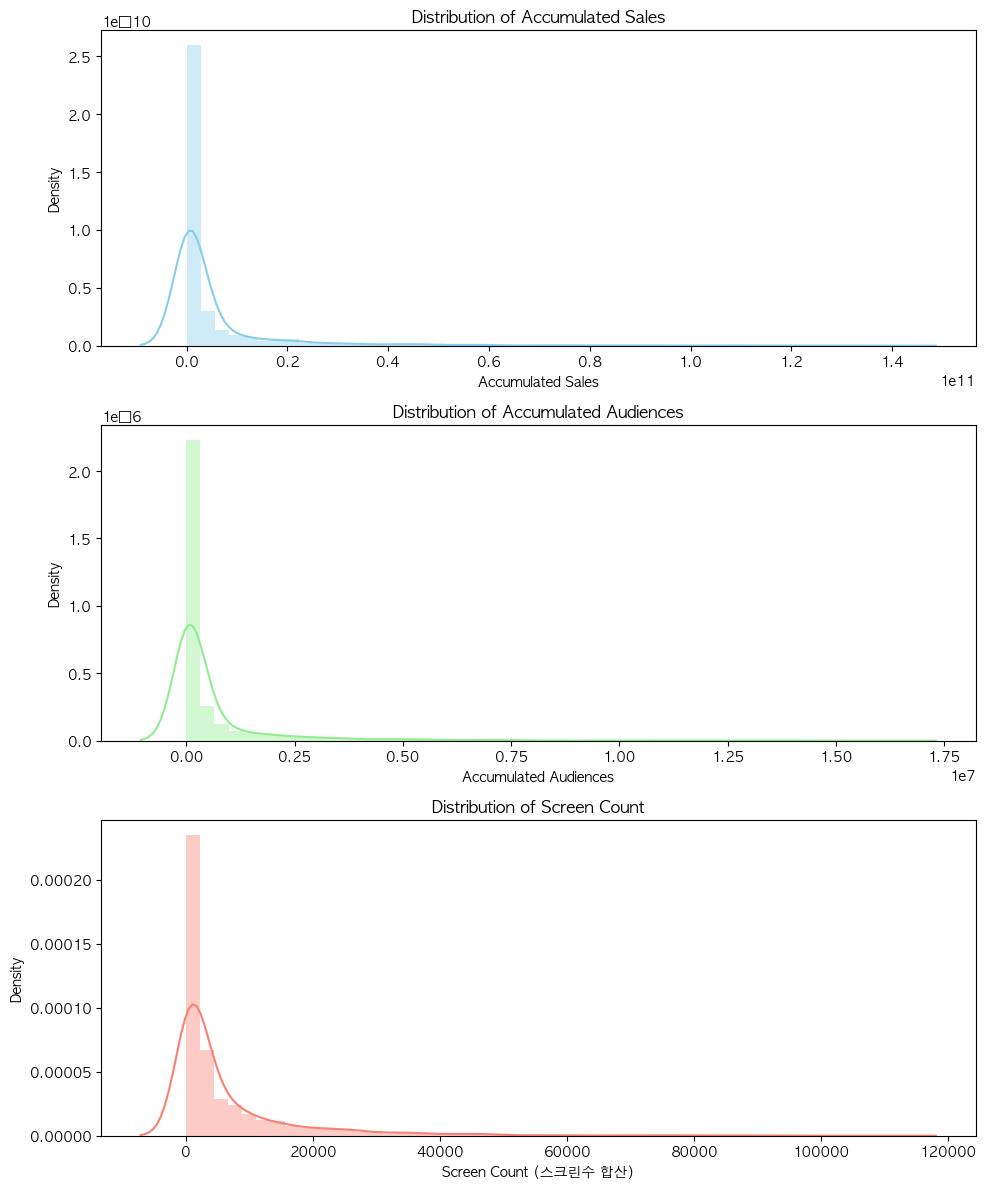

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 누적 매출
sns.distplot(agg_df['salesAcc'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Accumulated Sales')
axes[0].set_title('Distribution of Accumulated Sales')

# 관객 수 누적
sns.distplot(agg_df['audiAcc'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Accumulated Audiences')
axes[1].set_title('Distribution of Accumulated Audiences')

# 스크린 수 누적
sns.distplot(agg_df['scrnCnt'], ax=axes[2], color='salmon')
axes[2].set_xlabel('Screen Count (스크린수 합산)')
axes[2].set_title('Distribution of Screen Count')

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


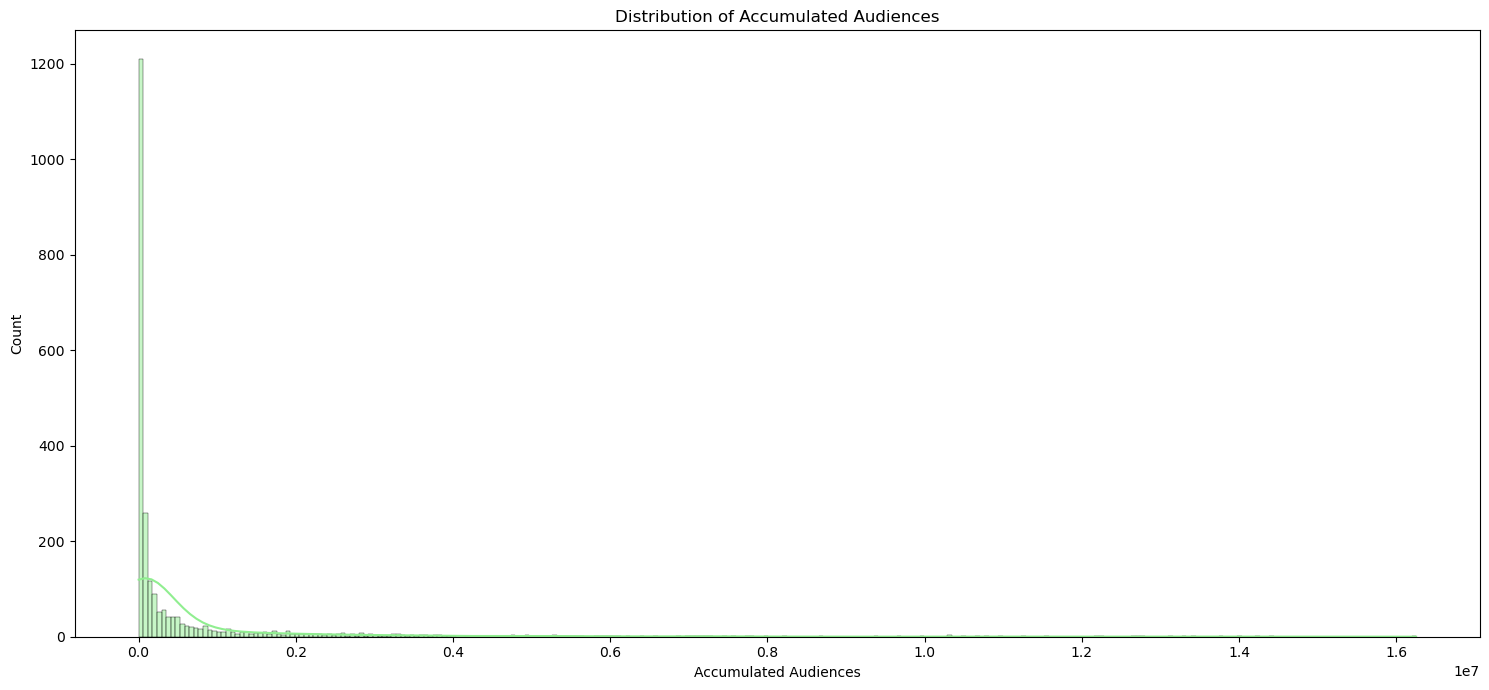

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, LogFormatter
import matplotlib

# 기본 폰트를 DejaVu Sans로 설정
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

# 원래 데이터로 히스토그램
sns.histplot(agg_df['audiAcc'], ax=axes, color='lightgreen', kde=True)
axes.set_xlabel('Accumulated Audiences')
axes.set_title('Distribution of Accumulated Audiences')
plt.tight_layout()
plt.show()


#### 상영 시간 분포

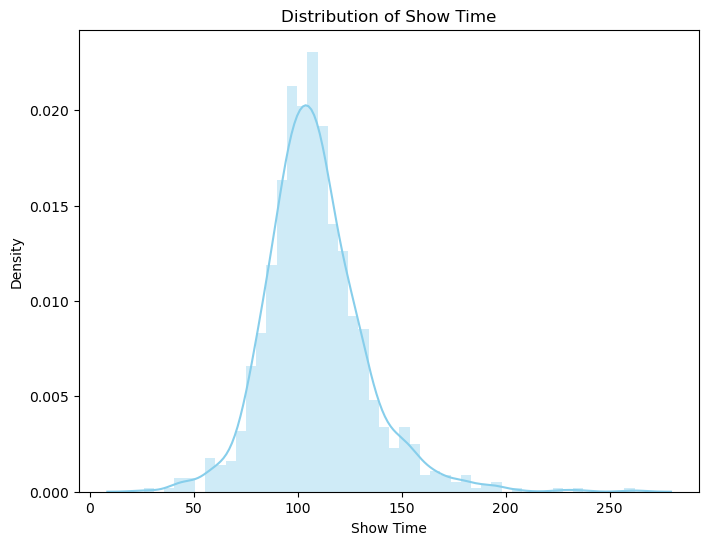

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(agg_df['showTm'], color='skyblue', ax=ax)
ax.set_xlabel('Show Time')
ax.set_ylabel('Density')
ax.set_title('Distribution of Show Time')
plt.show()

#### 범주형 변수 분포 (타입, 국가, 장르, 상영타입)   

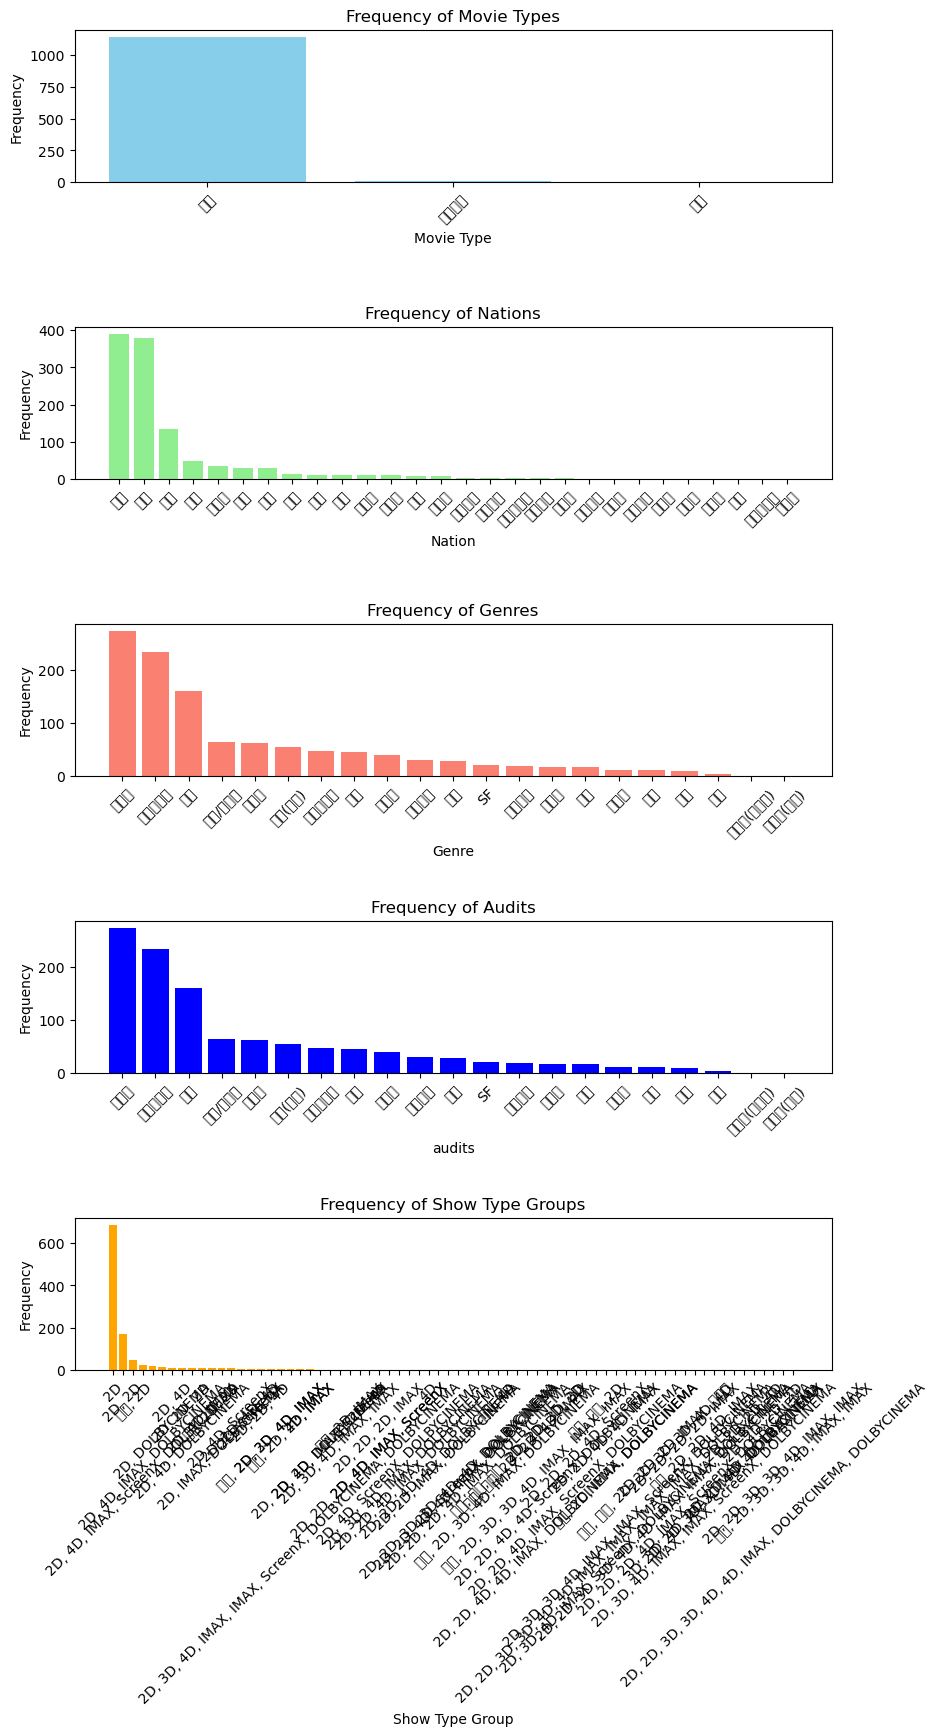

In [27]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, axes = plt.subplots(5, 1, figsize=(10, 18))

# 'typeNm' 열의 카운트 플롯
type_counts = agg_df['typeNm'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='skyblue')
axes[0].set_xlabel('Movie Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Movie Types')
axes[0].tick_params(axis='x', rotation=45)

# 'nationNm' 열의 카운트 플롯
nation_counts = agg_df['nationNm'].value_counts()
axes[1].bar(nation_counts.index, nation_counts.values, color='lightgreen')
axes[1].set_xlabel('Nation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Nations')
axes[1].tick_params(axis='x', rotation=45)

# 'genreNm' 열의 카운트 플롯
genre_counts = agg_df['genreNm'].value_counts()
axes[2].bar(genre_counts.index, genre_counts.values, color='salmon')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Frequency of Genres')
axes[2].tick_params(axis='x', rotation=45)

audits_counts = agg_df['audits'].value_counts()
axes[3].bar(genre_counts.index, genre_counts.values, color='blue')
axes[3].set_xlabel('audits')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Audits')
axes[3].tick_params(axis='x', rotation=45)

# 'showTypeGroupNm' 열의 카운트 플롯
showTypeGroup_counts = agg_df['showTypeGroupNm'].value_counts()
axes[4].bar(showTypeGroup_counts.index, showTypeGroup_counts.values, color='orange')
axes[4].set_xlabel('Show Type Group')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of Show Type Groups')
axes[4].tick_params(axis='x', rotation=45)

# 그래프 간 간격 조절
plt.tight_layout(pad=3.0)

# 그래프 출력
plt.show()


showtypegroup 전처리/인코딩 필요 > 지원하는 상영 타입 / IMAX 상영여부 / 돌비시네마 상영 여부 / 스크린 엑스 상영여부 등으로 원핫인코딩

#### 상영 타입 > 원핫 인코딩(1,0)

In [28]:
# None 값이 아닌 것만 필터링하고 쉼표로 분할하여 유니크한 값 추출
unique_show_types = set(item.strip() for sublist in agg_df['showTypeGroupNm'] if sublist is not None for item in sublist.split(','))

In [29]:
# 상영 타입에 따라 컬럼 생성 > 존재하면 1, 존재하지 않으면 0부여
for show_type in unique_show_types:
    agg_df[show_type] = agg_df['showTypeGroupNm'].apply(lambda x: 1 if isinstance(x, str) and show_type in x.split(', ') else 0)

In [30]:
agg_df['4D'].head() # 테스트

0    1
1    0
2    0
3    1
4    0
Name: 4D, dtype: int64

In [31]:
agg_df.columns

Index(['movieNm', 'movieCd', 'openDt', 'salesAcc', 'audiAcc', 'scrnCnt',
       'showTm', 'typeNm', 'nationNm', 'genreNm', 'director', 'actor1',
       'actor2', 'showTypeGroupNm', 'showTypeNm', 'audits', 'commercial',
       'first_until_weekday_audiAcc', 'first_until_weekday_salesAcc',
       '1_weeks_audiAcc', '1_weeks_salesAcc', '2_weeks_audiAcc',
       '2_weeks_salesAcc', '3_weeks_audiAcc', '3_weeks_salesAcc',
       '4_weeks_audiAcc', '4_weeks_salesAcc', '5_weeks_audiAcc',
       '5_weeks_salesAcc', '6_weeks_audiAcc', '6_weeks_salesAcc',
       '7_weeks_audiAcc', '7_weeks_salesAcc', '8_weeks_audiAcc',
       '8_weeks_salesAcc', 'IMAX', '필름', '2D', '4D', '흑백판', '3D', 'ScreenX',
       'DOLBYCINEMA'],
      dtype='object')

In [32]:
agg_df[['actor1','actor2']]

,actor1,actor2
0,유아인,박신혜
1,알랭 샤바,배두나
2,None,None
3,다니엘 크레이그,라미 말렉
4,None,None
...,...,...
2427,None,None
2428,권상우,정준호
2429,None,None
2430,None,None


## 3. EDA

### 전체/상업영화 구분

In [33]:
df1 = pd.read_csv('../data/boxoffice_15_24_total.csv') # 23년까지 전체
df2 = pd.read_csv('../data/boxoffice_y_15_24_total.csv') # 24년까지 상업영화만

In [34]:
df1[df1['current_date'] =='2015-01-01']['salesAmt']

0    6129982500
1    2644551100
2    1687516200
3    1479015600
4    1299883700
5     609678800
6     299346400
7     233190700
8     230484800
9     192143100
Name: salesAmt, dtype: int64

In [35]:
openDt_sales = df1[['current_date', 'salesAmt','audiCnt']]
sales_by_date = openDt_sales.groupby('current_date').sum()
sales_by_date.reset_index(inplace=True)
sales_by_date['current_date'] = pd.to_datetime(sales_by_date['current_date'])
sales_by_date.set_index('current_date', inplace = True)

# 관객 수 대비 매출액 컬럼 생성
sales_by_date['sales_per_audi'] = sales_by_date['salesAmt'] / sales_by_date['audiCnt']

## ------------------------
openDt_sales_y = df2[['current_date', 'salesAmt','audiCnt']]
sales_by_date_y = openDt_sales_y.groupby('current_date').sum()
sales_by_date_y.reset_index(inplace=True)
sales_by_date_y['current_date'] = pd.to_datetime(sales_by_date_y['current_date'])
sales_by_date_y.set_index('current_date', inplace = True)

# 관객 수 대비 매출액 컬럼 생성
sales_by_date_y['sales_per_audi'] = sales_by_date_y['salesAmt'] / sales_by_date_y['audiCnt']

In [36]:
sales_by_date

,salesAmt,audiCnt,sales_per_audi
current_date,,,
2015-01-01,14805792900,1813280,8165.199473
2015-01-02,9180385329,1139710,8055.018671
2015-01-03,11659221436,1442435,8083.013402
2015-01-04,10040443500,1243920,8071.615136
2015-01-05,3590920000,480270,7476.877590
...,...,...,...
2024-03-27,2562193100,318075,8055.311169
2024-03-28,1790976821,186095,9623.992160
2024-03-29,2377408767,234748,10127.493171


In [37]:
# 월별 리샘플링
monthly_sales = sales_by_date.resample('M').sum()
monthly_sales_y = sales_by_date_y.resample('M').sum()

In [38]:
monthly_sales

,salesAmt,audiCnt,sales_per_audi
current_date,,,
2015-01-31,168692228937,21483028,238994.950016
2015-02-28,123928243475,15660441,217271.430962
2015-03-31,84919119661,10667146,242141.255046
2015-04-30,100259926081,12322515,237371.274041
2015-05-31,141172278147,17239123,250422.168074
...,...,...,...
2023-11-30,66639112965,6962168,286678.016805
2023-12-31,158937563442,16145220,299773.219471
2024-01-31,69237436626,7200090,294748.163988


In [39]:
df = agg_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movieNm                       2432 non-null   object        
 1   movieCd                       2432 non-null   object        
 2   openDt                        2410 non-null   datetime64[ns]
 3   salesAcc                      2432 non-null   int64         
 4   audiAcc                       2432 non-null   int64         
 5   scrnCnt                       2432 non-null   int64         
 6   showTm                        1146 non-null   float64       
 7   typeNm                        1155 non-null   object        
 8   nationNm                      1155 non-null   object        
 9   genreNm                       1154 non-null   object        
 10  director                      1037 non-null   object        
 11  actor1                        

In [40]:
def visualize_movie_data(df):
    # Figure 생성
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 시각화 1: 매출액 대비 국가 분포
    sns.countplot(data=df, x='nationNm', order=df['nationNm'].value_counts().index[:5], ax=axes[0, 0])
    axes[0, 0].set_title('매출액 대비 국가 분포')

    # 시각화 2: 장르별 매출액 비교
    sns.boxplot(data=df, x='genreNm', y='salesAcc', ax=axes[0, 1])
    axes[0, 1].set_title('장르별 매출액 비교')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 시각화 3: 감독별 매출액 순위 (상위 10명)
    top_directors = df.groupby('director')['salesAcc'].sum().nlargest(10)
    top_directors.plot(kind='bar', ax=axes[0, 2])
    axes[0, 2].set_title('감독별 매출액 순위')
    axes[0, 2].set_xlabel('감독')
    axes[0, 2].set_ylabel('누적 매출액')

    # 시각화 4: 주요 배우1의 매출액 순위 (상위 10명)
    top_actors1 = df.groupby('actor1')['salesAcc'].sum().nlargest(10)
    top_actors1.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('주요 배우1별 매출액 순위')
    axes[1, 0].set_xlabel('주요 배우1')
    axes[1, 0].set_ylabel('누적 매출액')

    # 시각화 5: 주요 배우2의 매출액 순위 (상위 10명)
    top_actors2 = df.groupby('actor2')['salesAcc'].sum().nlargest(10)
    top_actors2.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('주요 배우2별 매출액 순위')
    axes[1, 1].set_xlabel('주요 배우2')
    axes[1, 1].set_ylabel('누적 매출액')
    
    # 시각화 6: 등급별 매출액 비교
    sns.boxplot(data=df, x='audits', y='salesAcc', ax=axes[1, 2])
    axes[1, 2].set_title('등급별 매출액 비교')


    # 레이아웃 조정
    plt.tight_layout()

    # 시각화 출력
    plt.show()


def visualize_show_type_count(df):
    # Figure 생성
    fig, ax = plt.subplots(figsize=(10, 6))

    # 상영 유형별 영화 개수 세기
    show_type_counts = df[['DOLBYCINEMA', 'IMAX', '흑백판', '2D', '4D', '필름', 'ScreenX', '3D']].sum()

    # 시각화
    show_type_counts.plot(kind='bar', ax=ax)
    ax.set_title('상영 유형별 영화 개수')
    ax.set_xlabel('상영 유형')
    ax.set_ylabel('영화 개수')

    # 레이아웃 조정
    plt.tight_layout()

    # 시각화 출력
    plt.show()

    

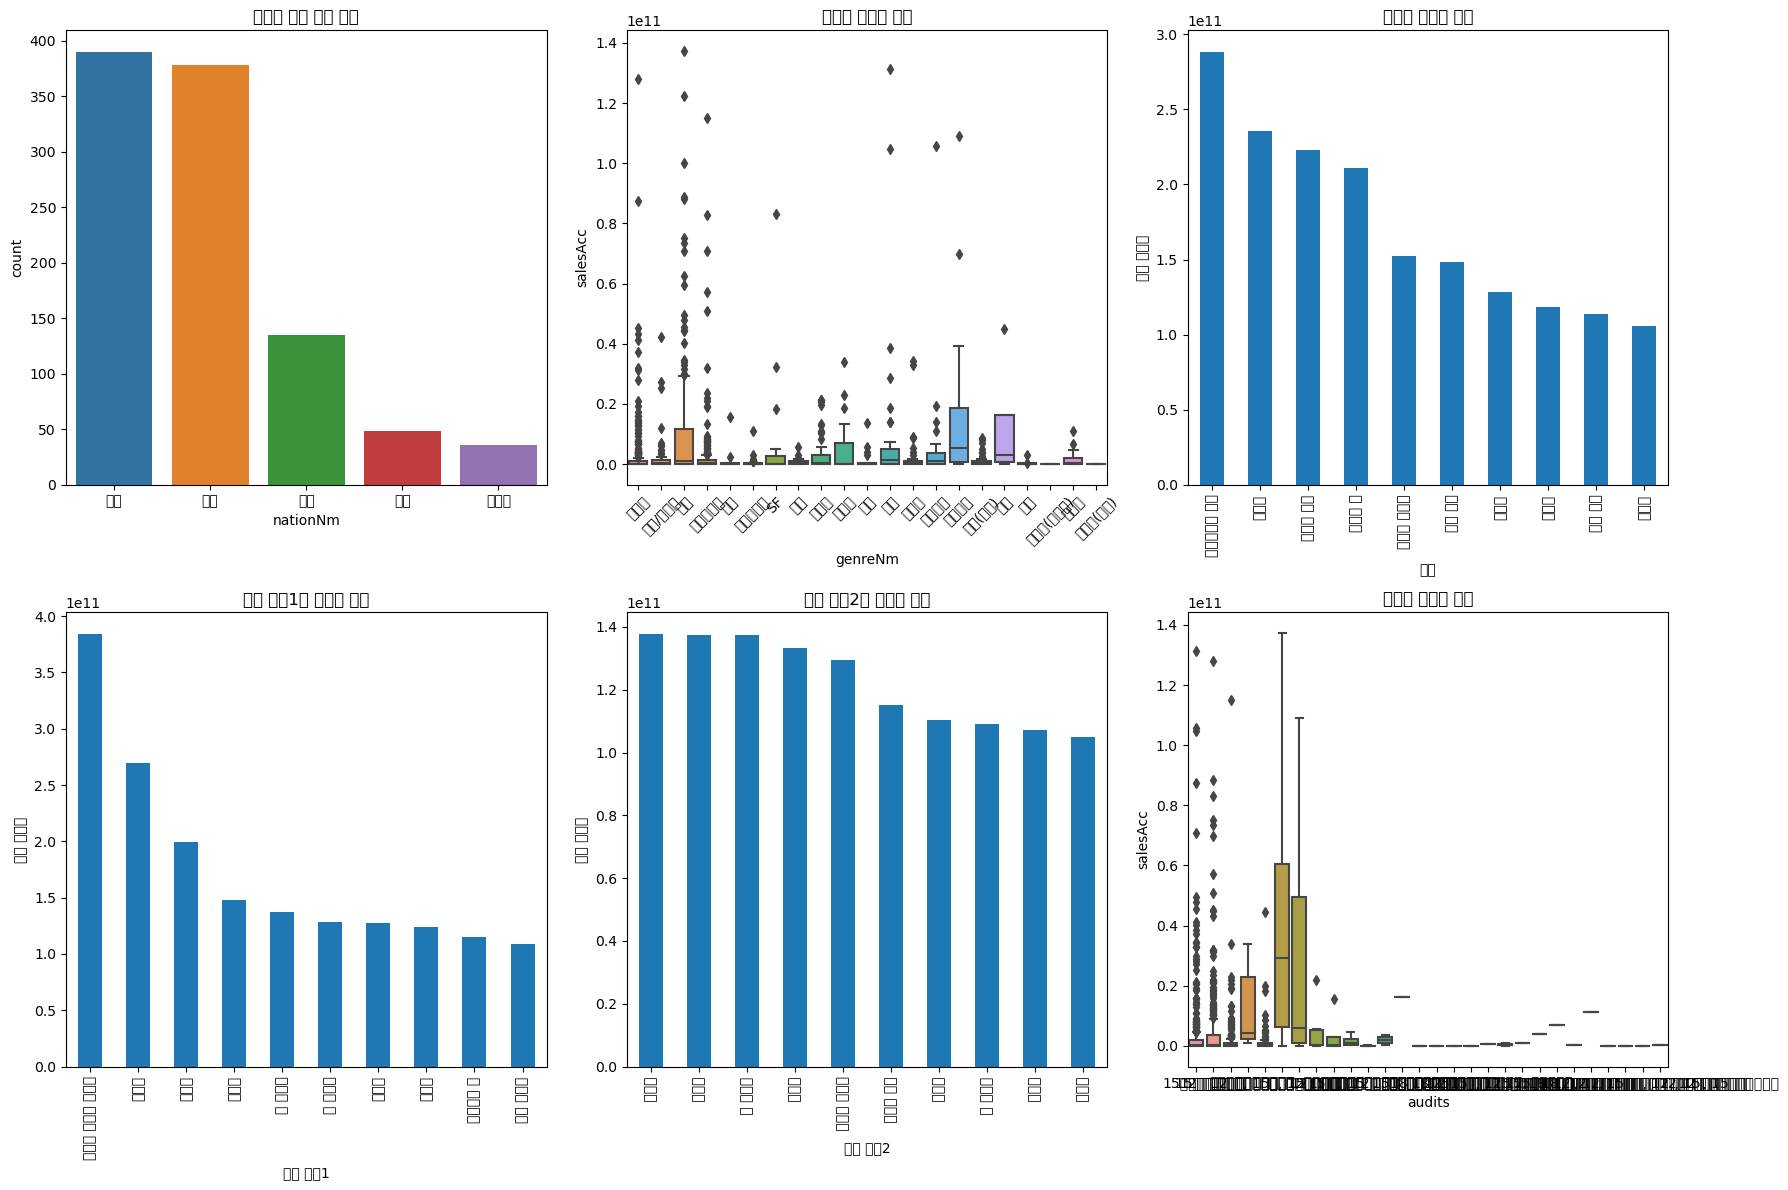

In [41]:
visualize_movie_data(df)

In [42]:
df.columns

Index(['movieNm', 'movieCd', 'openDt', 'salesAcc', 'audiAcc', 'scrnCnt',
       'showTm', 'typeNm', 'nationNm', 'genreNm', 'director', 'actor1',
       'actor2', 'showTypeGroupNm', 'showTypeNm', 'audits', 'commercial',
       'first_until_weekday_audiAcc', 'first_until_weekday_salesAcc',
       '1_weeks_audiAcc', '1_weeks_salesAcc', '2_weeks_audiAcc',
       '2_weeks_salesAcc', '3_weeks_audiAcc', '3_weeks_salesAcc',
       '4_weeks_audiAcc', '4_weeks_salesAcc', '5_weeks_audiAcc',
       '5_weeks_salesAcc', '6_weeks_audiAcc', '6_weeks_salesAcc',
       '7_weeks_audiAcc', '7_weeks_salesAcc', '8_weeks_audiAcc',
       '8_weeks_salesAcc', 'IMAX', '필름', '2D', '4D', '흑백판', '3D', 'ScreenX',
       'DOLBYCINEMA'],
      dtype='object')

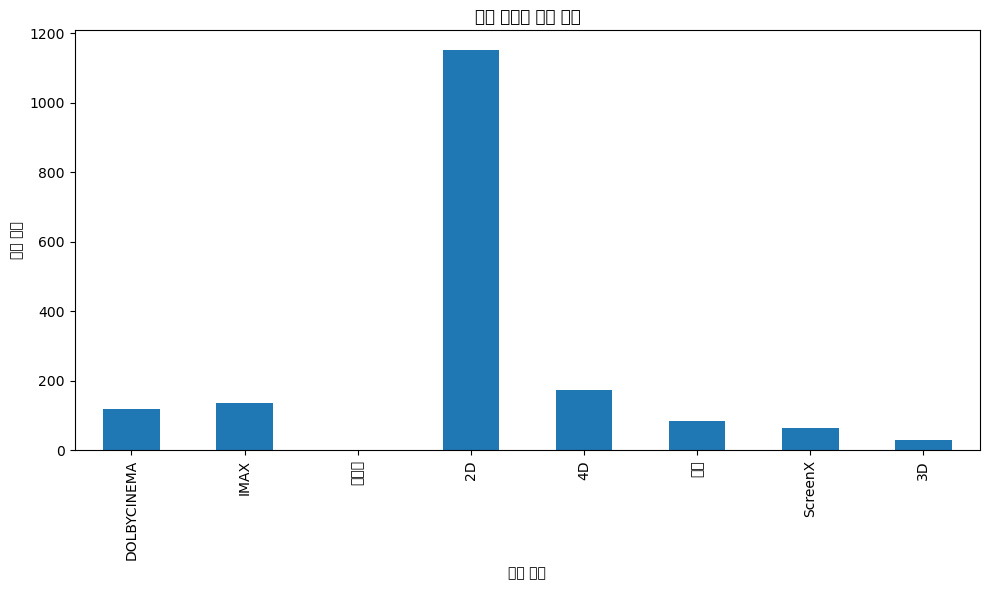

In [43]:
visualize_show_type_count(df)

#### 1. 관객수/매출액에 영향력 있는 지표

##### 상관계수 확인
- 전체 박스오피스, 상업영화 박스오피스로 구분

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df, threshold):
    # 상관 계수 계산
    correlation_matrix = df.corr()
    
    # 히트맵의 반만 표시하기 위한 mask 생성
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # 임계값 이상의 상관 계수만 남기고 나머지는 NaN으로 변경
    correlation_matrix = correlation_matrix.where(
        (correlation_matrix > threshold) | (correlation_matrix < -threshold)
    )
    
    # 상관 관계 히트맵 그리기
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
    plt.title(f'Correlation Heatmap of Features (Threshold = {threshold}) (Upper Triangle)')
    plt.show()

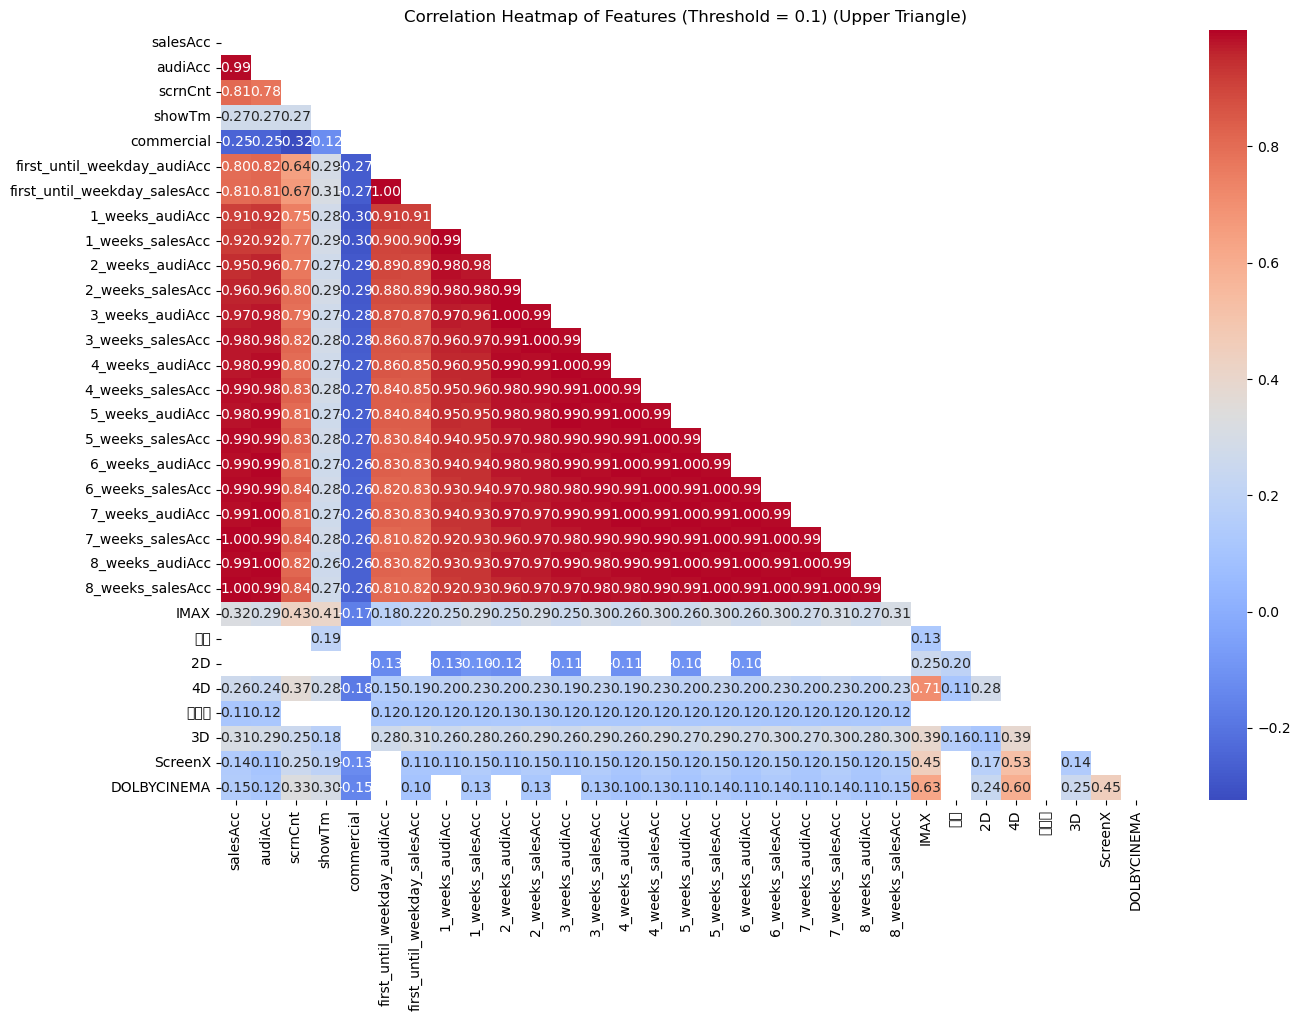

In [45]:
plot_correlation_heatmap(df, 0.1)

- 첫번째 주 주말까지의 매출액, 관객 수가 매출액, 관객 수와 높은 상관관계를 보임

In [46]:
com_df = df[df['commercial'] == 1]

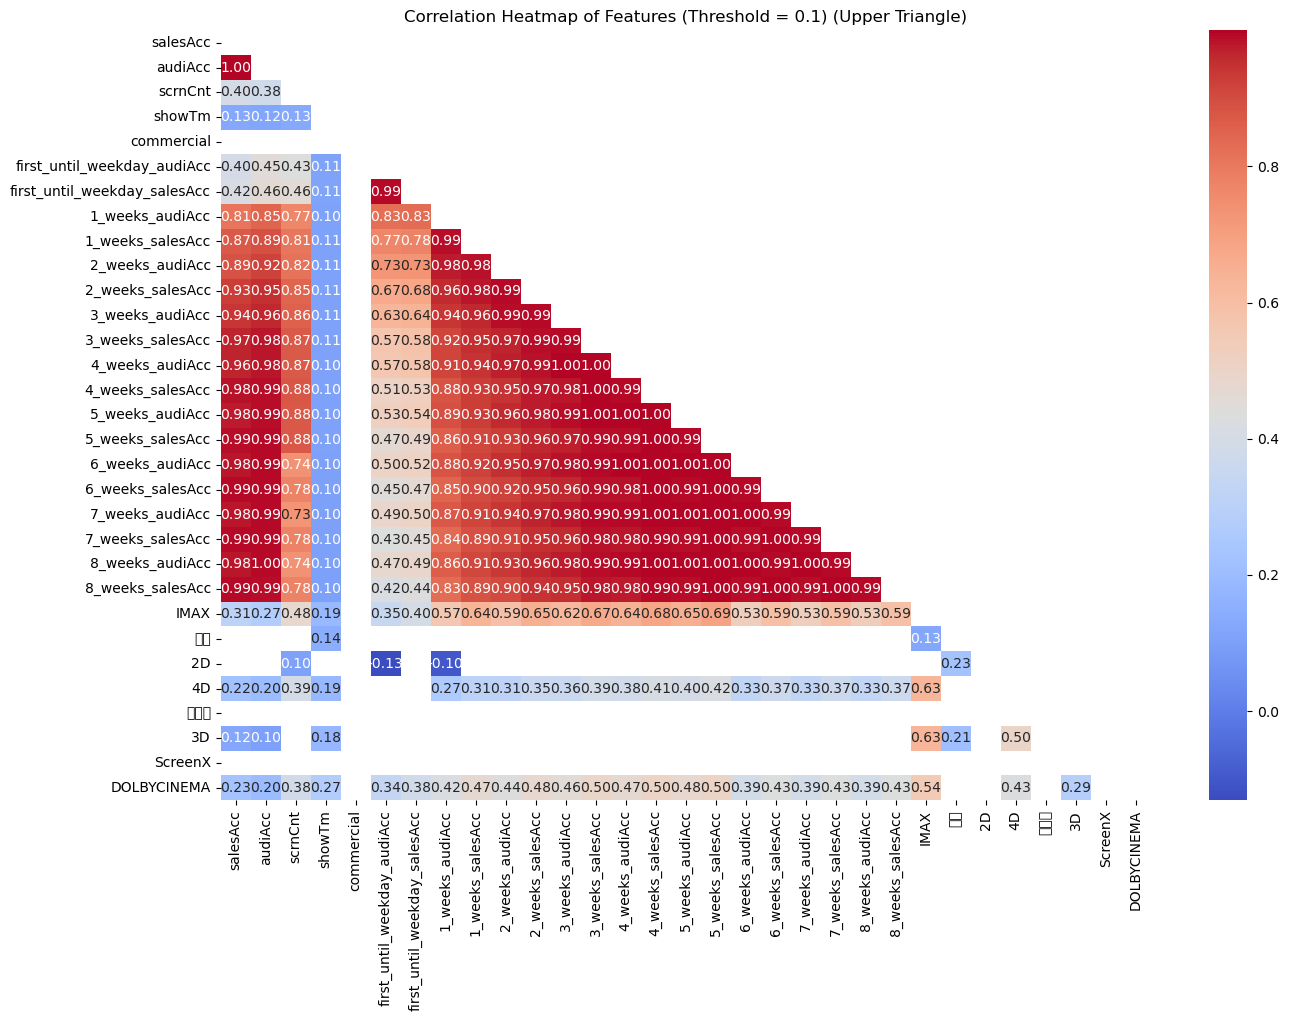

In [47]:
plot_correlation_heatmap(com_df, 0.1)

In [48]:
def features_correlation_with_target(df, target_variable, threshold):
    # 상관 계수 계산
    correlations = df.corr()[target_variable]
    
    # 임계값 이상의 상관 계수를 가지는 피처 선택
    selected_features = correlations[(correlations.abs() >= threshold) & (correlations.index != target_variable)]
    
    # 선택된 피처들과 타겟 변수의 상관 관계 출력
    print(f"Target : {target_variable}")
    for feature, correlation in selected_features.items():
        print(f"{feature}, {correlation:.2f}")

In [49]:
def features_correlation_with_target(df, target_variable, threshold):
    # 상관 계수 계산
    correlations = df.corr()[target_variable]
    
    # 임계값 이상의 상관 계수를 가지는 피처 선택
    selected_features = correlations[(correlations.abs() >= threshold) & (correlations.index != target_variable)]
    
    # 선택된 피처들과 타겟 변수의 상관 관계 출력
    print(f"Target : {target_variable}")
    correlation_table = selected_features.reset_index().rename(columns={"index": "Feature", target_variable: "Correlation"})
    print(correlation_table.to_string(index=False))

- 전체 박스오피스 상관계수

In [50]:
target_variable = "audiAcc"  
threshold = 0.1
features_correlation_with_target(df, target_variable, threshold)

Target : audiAcc
                     Feature  Correlation
                    salesAcc     0.993015
                     scrnCnt     0.779748
                      showTm     0.270803
                  commercial    -0.251098
 first_until_weekday_audiAcc     0.816126
first_until_weekday_salesAcc     0.814563
             1_weeks_audiAcc     0.922782
            1_weeks_salesAcc     0.921332
             2_weeks_audiAcc     0.961872
            2_weeks_salesAcc     0.961801
             3_weeks_audiAcc     0.977474
            3_weeks_salesAcc     0.975323
             4_weeks_audiAcc     0.986717
            4_weeks_salesAcc     0.983794
             5_weeks_audiAcc     0.992060
            5_weeks_salesAcc     0.987928
             6_weeks_audiAcc     0.994941
            6_weeks_salesAcc     0.989654
             7_weeks_audiAcc     0.996491
            7_weeks_salesAcc     0.990587
             8_weeks_audiAcc     0.997387
            8_weeks_salesAcc     0.991147
                 

In [51]:
target_variable = "salesAcc"  # 타겟 변수 설정
threshold = 0.1  # 임계값 설정
features_correlation_with_target(df, target_variable, threshold)

Target : salesAcc
                     Feature  Correlation
                     audiAcc     0.993015
                     scrnCnt     0.809933
                      showTm     0.271016
                  commercial    -0.247506
 first_until_weekday_audiAcc     0.798133
first_until_weekday_salesAcc     0.805657
             1_weeks_audiAcc     0.909193
            1_weeks_salesAcc     0.918585
             2_weeks_audiAcc     0.947215
            2_weeks_salesAcc     0.958614
             3_weeks_audiAcc     0.965737
            3_weeks_salesAcc     0.975770
             4_weeks_audiAcc     0.975821
            4_weeks_salesAcc     0.985497
             5_weeks_audiAcc     0.982331
            5_weeks_salesAcc     0.991094
             6_weeks_audiAcc     0.986296
            6_weeks_salesAcc     0.994177
             7_weeks_audiAcc     0.988372
            7_weeks_salesAcc     0.995781
             8_weeks_audiAcc     0.989558
            8_weeks_salesAcc     0.996712
                

영화 상영의 특성 (IMAX - 0.32, 3D - 0.31, 4D 등)이나 특정 주차별 관객수 추이 등이 audiAcc에 영향을 줄 수 있음

- 상업 영화 상관계수

In [52]:
target_variable = "audiAcc"  
threshold = 0.1
features_correlation_with_target(com_df, target_variable, threshold)

Target : audiAcc
                     Feature  Correlation
                    salesAcc     0.996064
                     scrnCnt     0.379390
                      showTm     0.120420
 first_until_weekday_audiAcc     0.450049
first_until_weekday_salesAcc     0.463635
             1_weeks_audiAcc     0.845214
            1_weeks_salesAcc     0.890010
             2_weeks_audiAcc     0.917471
            2_weeks_salesAcc     0.947390
             3_weeks_audiAcc     0.962383
            3_weeks_salesAcc     0.978997
             4_weeks_audiAcc     0.980766
            4_weeks_salesAcc     0.988467
             5_weeks_audiAcc     0.988343
            5_weeks_salesAcc     0.991217
             6_weeks_audiAcc     0.993555
            6_weeks_salesAcc     0.991534
             7_weeks_audiAcc     0.994281
            7_weeks_salesAcc     0.991809
             8_weeks_audiAcc     0.995211
            8_weeks_salesAcc     0.990920
                        IMAX     0.274975
                 

In [53]:
target_variable = "salesAcc"  # 타겟 변수 설정
threshold = 0.1  # 임계값 설정
features_correlation_with_target(com_df, target_variable, threshold)

Target : salesAcc
                     Feature  Correlation
                     audiAcc     0.996064
                     scrnCnt     0.398957
                      showTm     0.128447
 first_until_weekday_audiAcc     0.397974
first_until_weekday_salesAcc     0.416326
             1_weeks_audiAcc     0.812243
            1_weeks_salesAcc     0.867394
             2_weeks_audiAcc     0.886831
            2_weeks_salesAcc     0.927688
             3_weeks_audiAcc     0.939917
            3_weeks_salesAcc     0.967247
             4_weeks_audiAcc     0.964802
            4_weeks_salesAcc     0.982367
             5_weeks_audiAcc     0.976560
            5_weeks_salesAcc     0.988804
             6_weeks_audiAcc     0.977918
            6_weeks_salesAcc     0.992795
             7_weeks_audiAcc     0.979166
            7_weeks_salesAcc     0.993594
             8_weeks_audiAcc     0.981955
            8_weeks_salesAcc     0.994467
                        IMAX     0.309993
                

showTm 상관성 증가 외 특이 사항이 존재하지 않음

#### 2. 리샘플링 -  매출액, 관객수 추이

In [54]:
def plot_sales_by(sales_by,col, title):

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.plot(sales_by.index, sales_by[col])
    ax.set_title(title)
    ax.set_xlabel('opening date')
    ax.set_ylabel('Sales')

    plt.show()

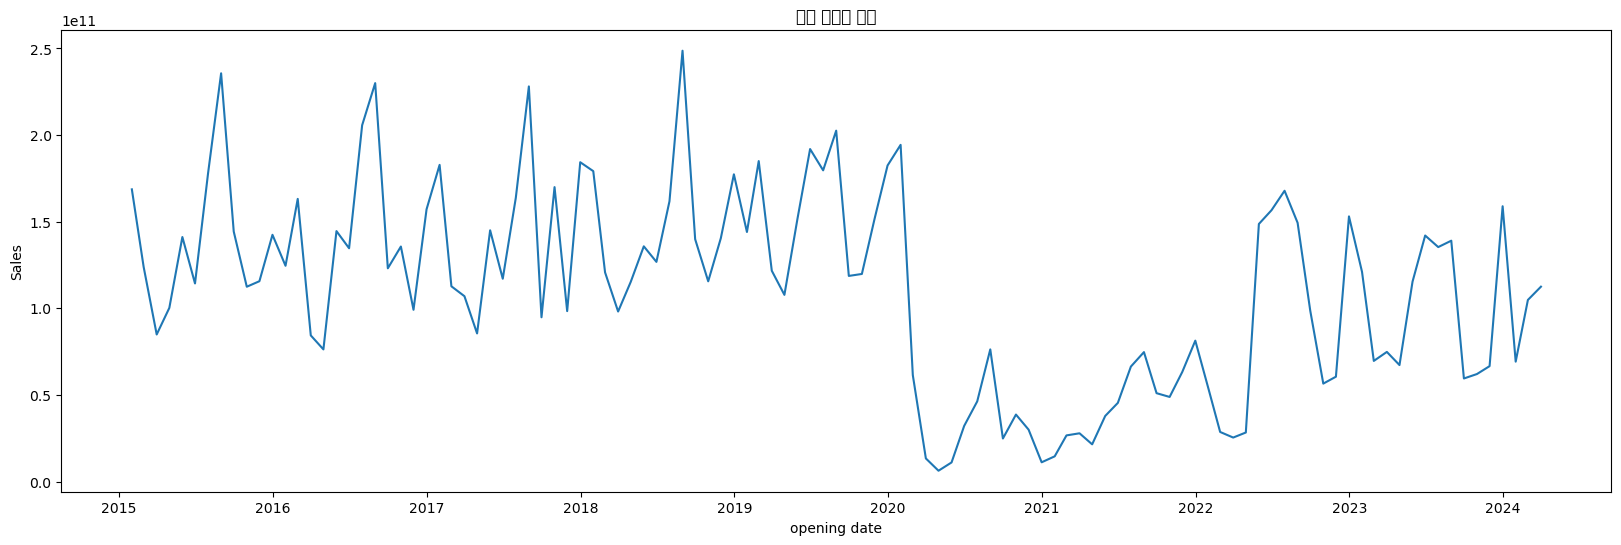

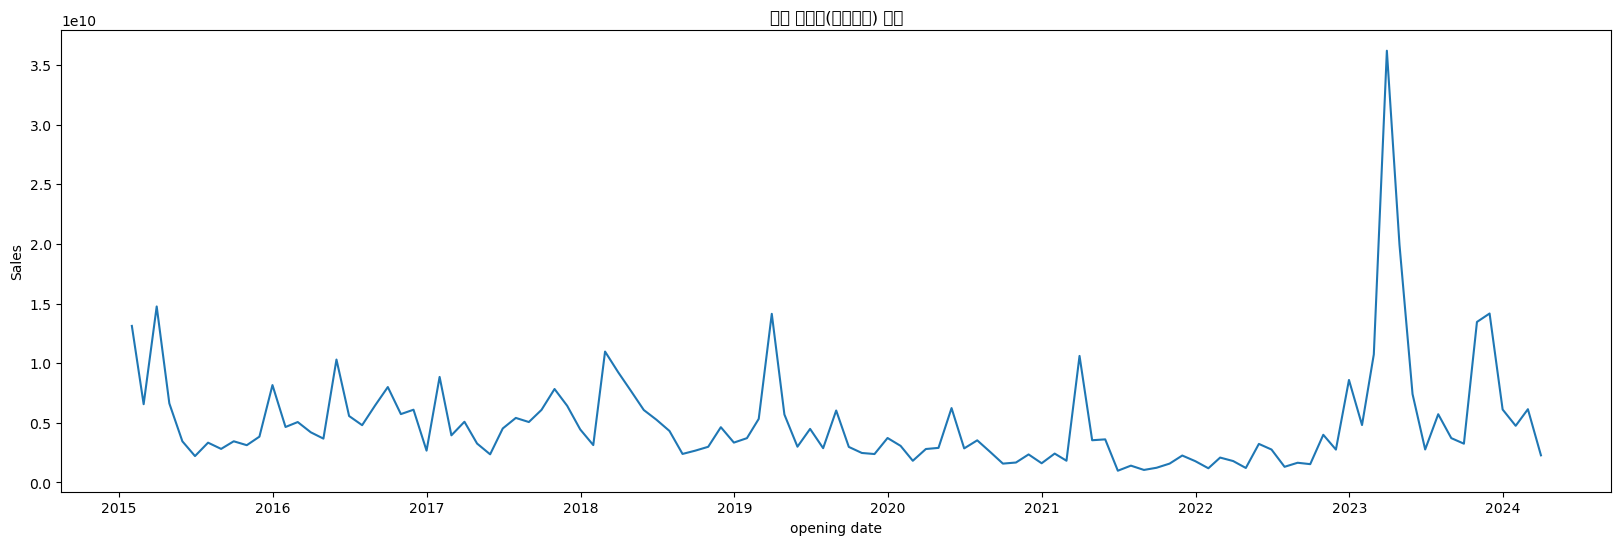

In [55]:
sales_by_month = sales_by_date.resample('M').sum()
sales_by_month_y = sales_by_date_y.resample('M').sum()
plot_sales_by(sales_by_month,'salesAmt','월별 매출액 추이')
plot_sales_by(sales_by_month_y,'salesAmt','월별 매출액(상업영화) 추이')

In [56]:
print(sales_by_month.describe())
print(sales_by_month_y.describe())

           salesAmt       audiCnt  sales_per_audi
count  1.110000e+02  1.110000e+02      111.000000
mean   1.115227e+11  1.294255e+07   265138.983876
std    5.681690e+10  7.103253e+06    28800.124315
min    6.274241e+09  8.236010e+05   217271.430962
25%    6.651922e+10  6.677473e+06   242875.521554
50%    1.156074e+11  1.377775e+07   256634.293673
75%    1.504411e+11  1.744581e+07   292747.134313
max    2.487107e+11  3.039935e+07   338538.382295
           salesAmt       audiCnt  sales_per_audi
count  1.110000e+02  1.110000e+02      111.000000
mean   5.052864e+09  6.022909e+05   248829.492372
std    4.502901e+09  4.777649e+05    24466.114449
min    9.872517e+08  1.211260e+05   203002.262659
25%    2.612000e+09  3.118555e+05   231874.662884
50%    3.717519e+09  4.558100e+05   241336.107943
75%    6.082545e+09  7.403820e+05   262166.880396
max    3.620643e+10  3.516081e+06   312744.534472


### 영화 산업 기간 구간화

In [57]:
sales_by_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2015-01-31 to 2024-03-31
Freq: M
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   salesAmt        111 non-null    int64  
 1   audiCnt         111 non-null    int64  
 2   sales_per_audi  111 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.5 KB


- 코로나 기간 정의
    - 2020 중 감소세가 시작된 달
    - 2022 중 가장 증가세가 시작된 달

In [58]:
def calculate_change_rate(series):
    return series.pct_change() * 100

# 이전 달 대비 매출액의 변화율 계산
sales_by_month['salesAmt_change_rate'] = calculate_change_rate(sales_by_month['salesAmt'])

In [59]:
# 1. 감소세가 시작된 달(2020 중)
sales_by_month_2020 = sales_by_month['2020']
decreasing_months_2020 = sales_by_month_2020[sales_by_month_2020['salesAmt_change_rate'] < 0]
start_of_decreasing_period_2020 = decreasing_months_2020.index[0]
print("감소세가 시작된 달(2020 중):", start_of_decreasing_period_2020)

# 2. 증가세가 시작된 달(2022년 중)
sales_by_month_2022 = sales_by_month['2022']
increasing_months_2022 = sales_by_month_2022[sales_by_month_2022['salesAmt_change_rate'] > 0]
start_of_increasing_period_2022 = increasing_months_2022.index[0]
print("가장 증가세가 시작된 달(2022년 중):", start_of_increasing_period_2022)

감소세가 시작된 달(2020 중): 2020-02-29 00:00:00
가장 증가세가 시작된 달(2022년 중): 2022-04-30 00:00:00


- 영화 산업 
    - 정체기 : 2015 ~ 2020.01
    - 팬데믹기간 : 2020.02 ~ 2022.04(26개월)
    - 회복기(정의) : 2022.05 ~ 2024.03

In [60]:
# 변화율 계산
def calculate_monthly_change_rate(column):
    return column.pct_change()

# 월별 변화율 계산 - 새로운 컬럼으로 추가(3)
for column in sales_by_month.columns:
    sales_by_month[f'{column}_change_rate'] = calculate_monthly_change_rate(sales_by_month[column])


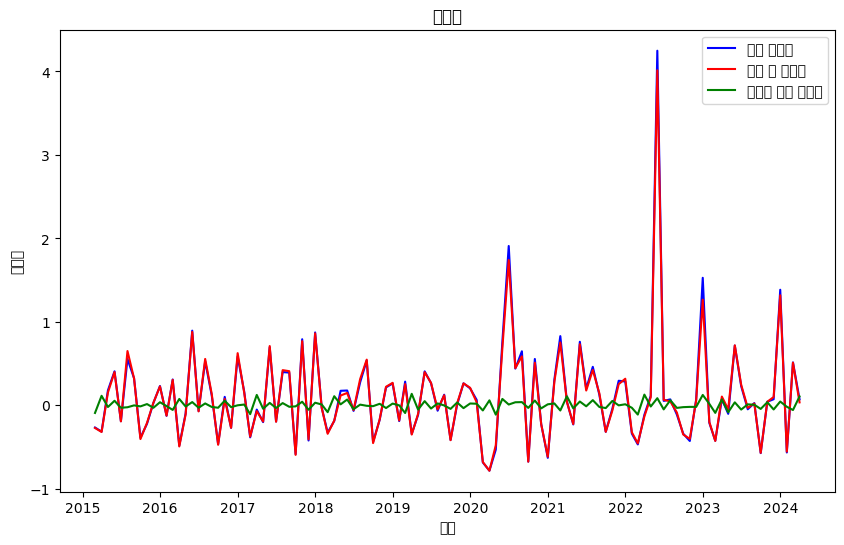

In [61]:
salesAmt_change_rate = sales_by_month['salesAmt_change_rate']
audiCnt_change_rate = sales_by_month['audiCnt_change_rate']
sales_per_audi_change_rate = sales_by_month['sales_per_audi_change_rate']

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 각 변화율 그래프 그리기
ax.plot(salesAmt_change_rate.index, salesAmt_change_rate, color='blue', label='매출 변화율')
ax.plot(audiCnt_change_rate.index, audiCnt_change_rate, color='red', label='관객 수 변화율')
ax.plot(sales_per_audi_change_rate.index, sales_per_audi_change_rate, color='green', label='관객당 매출 변화율')

# 각 변화율의 최대값과 최소값 찾기
max_indices = {
    'salesAmt': salesAmt_change_rate.idxmax(),
    'audiCnt': audiCnt_change_rate.idxmax(),
    'sales_per_audi': sales_per_audi_change_rate.idxmax()
}
min_indices = {
    'salesAmt': salesAmt_change_rate.idxmin(),
    'audiCnt': audiCnt_change_rate.idxmin(),
    'sales_per_audi': sales_per_audi_change_rate.idxmin()
}
# 그래프 세부 설정
ax.set_title('변화율')
ax.set_xlabel('날짜')
ax.set_ylabel('변화율')
ax.legend()
ax.grid(False)

# 그래프 출력
plt.show()


#### 1. 매출액, 관객수 기술통계
- 평균 매출, 평균 관객수, 평균 관객 당 매출액

In [62]:
sales_by_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2015-01-31 to 2024-03-31
Freq: M
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   salesAmt                          111 non-null    int64  
 1   audiCnt                           111 non-null    int64  
 2   sales_per_audi                    111 non-null    float64
 3   salesAmt_change_rate              110 non-null    float64
 4   audiCnt_change_rate               110 non-null    float64
 5   sales_per_audi_change_rate        110 non-null    float64
 6   salesAmt_change_rate_change_rate  109 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 6.9 KB


In [63]:
# 영화 산업 구간화
stagnation_period = sales_by_month.loc[:'2020-01']
pandemic_period = sales_by_month.loc['2020-02':'2022-03']
recovery_period = sales_by_month.loc['2022-04':'2024-03']

# 각 구간에 대한 describe
stagnation_description = stagnation_period.describe()
pandemic_description = pandemic_period.describe()
recovery_description = recovery_period.describe()


In [64]:
stagnation_period['salesAmt'].mean()

144944365732.68854

In [65]:
stagnation_period

,salesAmt,audiCnt,sales_per_audi,salesAmt_change_rate,audiCnt_change_rate,sales_per_audi_change_rate,salesAmt_change_rate_change_rate
current_date,,,,,,,
2015-01-31,168692228937,21483028,238994.950016,NaN,NaN,NaN,NaN
2015-02-28,123928243475,15660441,217271.430962,-0.265359,-0.271032,-0.090895,NaN
2015-03-31,84919119661,10667146,242141.255046,-0.314772,-0.318848,0.114464,0.186212
2015-04-30,100259926081,12322515,237371.274041,0.180652,0.155184,-0.019699,-1.573914
2015-05-31,141172278147,17239123,250422.168074,0.408063,0.398994,0.054981,1.258834
...,...,...,...,...,...,...,...
2019-09-30,118719677947,13932083,248367.997779,-0.413964,-0.417238,-0.042232,-4.245385
2019-10-31,119851438450,14285344,256816.669926,0.009533,0.025356,0.034017,-1.023029
2019-11-30,151511029722,18047344,248265.833270,0.264157,0.263347,-0.033295,26.709598


In [66]:
print("<<정체기(2015 ~ 2020.01)>>")
stagnation_description

<<정체기(2015 ~ 2020.01)>>


,salesAmt,audiCnt,sales_per_audi,salesAmt_change_rate,audiCnt_change_rate,sales_per_audi_change_rate,salesAmt_change_rate_change_rate
count,6.100000e+01,6.100000e+01,61.000000,60.000000,60.000000,60.000000,59.000000
mean,1.449444e+11,1.770544e+07,244850.197330,0.063251,0.063207,0.002555,-1.075384
std,4.038904e+10,5.023985e+06,10781.378107,0.358573,0.362710,0.050387,4.694427
min,7.629992e+10,9.391452e+06,217271.430962,-0.584205,-0.593273,-0.105160,-10.341747
25%,1.156074e+11,1.405648e+07,237984.980528,-0.194846,-0.194382,-0.029002,-2.774989
50%,1.405195e+11,1.655846e+07,243172.391050,0.046850,0.033791,-0.000661,-1.371609
75%,1.773696e+11,2.132874e+07,253744.948315,0.278002,0.278755,0.027832,-0.516824
max,2.487107e+11,3.039935e+07,268086.095118,0.894983,0.879800,0.138121,26.709598


In [67]:
print("\n<<팬데믹기간(2020.02 ~ 2022.04)>>")
pandemic_description


<<팬데믹기간(2020.02 ~ 2022.04)>>


,salesAmt,audiCnt,sales_per_audi,salesAmt_change_rate,audiCnt_change_rate,sales_per_audi_change_rate,salesAmt_change_rate_change_rate
count,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000
mean,3.919572e+10,4.210047e+06,274850.507852,0.099802,0.081705,0.007277,-1.634144
std,2.186156e+10,2.266665e+06,21351.355445,0.614907,0.579200,0.060116,3.027143
min,6.274241e+09,8.236010e+05,228889.249101,-0.782534,-0.783069,-0.111300,-11.462530
25%,2.500905e+10,2.663493e+06,258619.631390,-0.333124,-0.321693,-0.031818,-2.147908
50%,3.501212e+10,3.909272e+06,274881.041373,0.085671,0.092758,0.011268,-0.817665
75%,5.312516e+10,5.512346e+06,294706.617463,0.456334,0.440484,0.051134,0.100669
max,8.135528e+10,8.724278e+06,306414.210706,1.909246,1.741401,0.128692,1.795909


In [68]:
print("\n<<회복기(2022.05 ~ 2024.03)>>")
recovery_description


<<회복기(2022.05 ~ 2024.03)>>


,salesAmt,audiCnt,sales_per_audi,salesAmt_change_rate,audiCnt_change_rate,sales_per_audi_change_rate,salesAmt_change_rate_change_rate
count,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.049301e+11,1.029709e+07,306185.498705,0.267906,0.249656,0.002868,1.202072
std,4.174528e+10,4.026456e+06,14551.879686,0.992364,0.932309,0.058184,10.632896
min,2.833190e+10,2.855377e+06,278279.685816,-0.571987,-0.568891,-0.090039,-22.005607
25%,6.710367e+10,6.546846e+06,297411.486386,-0.134964,-0.114108,-0.044149,-1.662704
50%,1.086861e+11,1.091757e+07,303344.032952,0.061976,0.045292,-0.015134,-1.106117
75%,1.437058e+11,1.410786e+07,313558.231791,0.143600,0.140906,0.039223,0.432006
max,1.678784e+11,1.614522e+07,338538.382295,4.248688,4.014332,0.124798,36.058851


##### (요약)
- **정체기(2015 ~ 2020.01)**
    - (평균)매출액은 1조 4494억, 관객 수 : 1770만명, 관객당 매출: 24만원
    - 매출 변화율과 관객 수 변화율은 약 6.3%로 - 변화율 분산이 큼
- **팬데믹 기간(2020.02 ~ 2022.04)**
    - (평균) 매출액은 387억, 관객 수 : 415만명, 관객당 매출 : 27만원
    - 변화율 분산이 큼
- **회복기(2022.05 ~ 2024.03)**
    - (평균) 매출액 :  1조 8260억, 관객 수 : 1062만명, 관객당 매출 : 30만원
    - 변화율의 평균과 최대값이 높음

#### 2.국가별 점유율

In [69]:
df = df0.copy()

In [70]:
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,...,prdtStatNm,typeNm,nationNm,genreNm,director,actor,showTypeGroupNm,showTypeNm,audits,commercial
0,1,1,0,OLD,20137048,국제시장,2014-12-17,6129982500,40.5,2797599300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,2,1,OLD,20143642,테이큰 3,2015-01-01,2644551100,17.5,1640018100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,3,-1,OLD,20149859,마다가스카의 펭귄,2014-12-31,1687516200,11.2,672528400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,4,1,OLD,20141111,"님아, 그 강을 건너지 마오",2014-11-27,1479015600,9.8,698744500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,5,-1,OLD,20149265,기술자들,2014-12-24,1299883700,8.6,350703100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


- 컬럼 추가(구분)
    - 정체기 - Stagnation period - s
    - 펜데믹 기간 - Pandemic period - p
    - 회복기 - Recovery period - r

In [71]:
# 정체기 기간 설정
stagnation_mask = (df['openDt'] >= '2015-01-01') & (df['openDt'] <= '2020-01-31')
df.loc[stagnation_mask, 'period'] = 's'

# 펜데믹 기간 설정
pandemic_mask = (df['openDt'] >= '2020-02-01') & (df['openDt'] <= '2022-04-30')
df.loc[pandemic_mask, 'period'] = 'p'
  
recovery_mask = (df['openDt'] >= '2022-05-01') & (df['openDt'] <= '2024-03-31')
df.loc[recovery_mask , 'period'] = 'r'

- 한국 / 외국 영화 구분

In [72]:
df['nation'] = np.where(df['nationNm'] == '한국', '한국', '외국')

In [73]:
df['nationNm'].value_counts() 

미국       6332
한국       6054
일본       1940
영국        329
프랑스       273
중국        228
기타        177
홍콩        108
대만         84
호주         66
독일         58
스페인        57
러시아        48
이탈리아       32
캐나다        30
헝가리        27
네덜란드       22
페루         18
벨기에        17
우크라이나      15
노르웨이       13
아일랜드       11
폴란드         7
멕시코         2
브라질         1
뉴질랜드        1
아이슬란드       1
핀란드         1
Name: nationNm, dtype: int64

- period/nation 별 비교

In [74]:
# 'current_date'를 datetime 형식으로 변환
df['current_date'] = pd.to_datetime(df['current_date'])
df['month'] = df['current_date'].dt.to_period('M')

# 'period', 'nation', 'month' 별로 'salesAmt'와 'audiCnt' 합산
result = df.groupby(['period', 'nationNm', 'month']).agg({'salesAmt': 'sum', 'audiCnt': 'sum'}).reset_index()
result['sales_by_audi'] = result['salesAmt']/result['audiCnt']
result

,period,nationNm,month,salesAmt,audiCnt,sales_by_audi
0,p,기타,2020-04,56344280,6659,8461.372578
1,p,기타,2020-08,290958830,31592,9209.889529
2,p,기타,2020-09,25016960,4232,5911.379962
3,p,기타,2020-12,60818080,7024,8658.610478
4,p,기타,2021-01,147887750,18006,8213.248362
...,...,...,...,...,...,...
422,s,한국,2020-02,15141703310,1853085,8171.078666
423,s,한국,2020-03,35837600,5252,6823.610053
424,s,한국,2020-04,159060920,21946,7247.831951
425,s,한국,2020-08,10719000,1114,9622.082585


In [75]:
# 전체 기간별 매출액 계산
total_sales_by_period = df.groupby('period')['salesAmt'].sum()

# 각 기간별 국가별 매출액 계산
sales_by_period_and_nation = df.groupby(['period', 'nationNm'])['salesAmt'].sum()

# 각 기간별 국가별 점유율 계산
sales_percentage_by_period_and_nation = (sales_by_period_and_nation / total_sales_by_period) * 100

# 각 기간별 전체 관객수 계산
total_audi_by_period = df.groupby('period')['audiCnt'].sum()

# 각 기간별 국가별 관객수 계산
audi_by_period_and_nation = df.groupby(['period', 'nationNm'])['audiCnt'].sum()

# 각 기간별 국가별 관객수 점유율 계산
audi_percentage_by_period_and_nation = (audi_by_period_and_nation / total_audi_by_period) * 100

# 결과 데이터프레임 생성
result = pd.concat([sales_percentage_by_period_and_nation, audi_percentage_by_period_and_nation], axis=1)
result.columns = ['sales_percentage', 'audi_percentage']

result


sales_percentage  audi_percentage
period nationNm                                   
p      기타                0.130451         0.141613
       네덜란드              0.022313         0.024213
       노르웨이              0.004233         0.004701
       뉴질랜드              0.000586         0.000676
       대만                0.084007         0.094214
       독일                0.011623         0.013486
       러시아               0.046399         0.053309
       미국               49.034358        47.584579
       브라질               0.000355         0.000423
       스페인               0.109562         0.119266
       아일랜드              0.005048         0.005516
       영국                0.556675         0.614592
       우크라이나             0.042354         0.048655
       이탈리아              0.004116         0.004274
       일본                4.192051         4.178693
       중국                0.542284         0.556023
       캐나다               0.020130         0.022583
       폴란드               0.006767         0.007255
       프랑스               0.280545         0.306065
       한국               44.053195        45.347892
       헝가리               0.123765         0.117177
       호주                0.043031         0.049973
       홍콩                0.060199         0.065865
r      기타                0.050316         0.055363
       노르웨이              0.008095         0.008602
       대만                0.142597         0.147298
       독일                0.064184         0.074982
       러시아               0.003682         0.004293
       멕시코               0.002447         0.002673
       미국               36.584827        35.124628
       벨기에               0.022663         0.025207
       스페인               0.002131         0.002603
       아일랜드              0.004702         0.006371
       영국                0.147472         0.164166
       우크라이나             0.010046         0.011329
       이탈리아              0.000327         0.000374
       일본                8.597413         8.587860
       중국                0.056868         0.065246
       캐나다               0.009482         0.012394
       페루                0.012521         0.016069
       프랑스               0.108472         0.122664
       핀란드               0.000618         0.000704
       한국               54.074951        55.463154
       헝가리               0.013319         0.015042
       호주                0.076076         0.080712
       홍콩                0.006792         0.008265
s      대만                0.001114         0.001144
       독일                0.000285         0.000350
       러시아               0.008415         0.008409
       미국                0.692153         0.681460
       벨기에               0.001535         0.002314
       아이슬란드             0.000098         0.000145
       영국                0.000806         0.000726
       이탈리아              0.003952         0.003636
       일본                0.030698         0.025163
       중국                0.010187         0.009322
       캐나다               0.000149         0.000188
       프랑스               0.011986         0.011783
       한국                1.796212         1.726092

##### (요약)
- 팬데믹 기간 (p)
    - 미국이 매출액과 관객수 모두에서 가장 큰 비중을 차지(각각 49.20%, 47.90%)
    - 한국은 매출액에서 43.84%, 관객수에서 44.98%를 차지하여 미국 다음으로 큰 비중
- 회복기 (r)
    - 한국이 매출액과 관객수 모두에서 가장 큰 비중을 차지(각각 53.57%, 55.03%)
    - 미국은 매출액에서 36.92%, 관객수에서 35.36%를 차지하여 한국 다음으로 큰 비중

#### 3. 관객수 구간화
- 200만을 잡아라…영화 ‘대박과 쪽박’의 갈림길(https://www.hani.co.kr/arti/culture/culture_general/1102091.html)
- '목적형 관람문화' 정착

- 구간화

In [76]:
movie_100_under = df[df['audiAcc'] <= 1000000]['movieNm'].unique().tolist()
# 100만 이상 200만 미만
movie_100_200 = df[(df['audiAcc'] > 1000000) & (df['audiAcc'] < 2000000)]['movieNm'].unique().tolist()
# 200만 이상 300만 미만
movie_200_300 = df[(df['audiAcc'] >= 2000000) & (df['audiAcc'] < 3000000)]['movieNm'].unique().tolist()
# 300만 이상
movie_300 = df[df['audiAcc'] >= 3000000]['movieNm'].unique().tolist()

# movie_200 = df[df['audiAcc'] >= 2000000]['movieNm'].unique().tolist()

In [77]:
# 100만 이하
df_100_under = df[df['audiAcc'] <= 1000000]
# 100만 이상 200만 미만
df_100_200 = df[(df['audiAcc'] > 1000000) & (df['audiAcc'] < 2000000)]
# 200만 이상 300만 미만
df_200_300 = df[(df['audiAcc'] >= 2000000) & (df['audiAcc'] < 3000000)]
# 300만 이상
df_300_over = df[df['audiAcc'] >= 3000000]

##### 3.1 관객수 200만 이상 영화

In [78]:
len(df[df['audiAcc'] >= 2000000])

7267

In [79]:
movie_200 = df[df['audiAcc'] >= 2000000]['movieNm'].unique().tolist()
movie_200_rows = df[df['audiAcc'] >= 2000000]

In [80]:
movie_200_summary = movie_200_rows.groupby('movieNm').agg({
    'openDt': 'first',
    'current_date': 'min', #min
    'audiAcc': 'max',
    'period':'first'
})

movie_200_summary.reset_index(inplace = True)

In [81]:
movie_200_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movieNm       222 non-null    object        
 1   openDt        222 non-null    object        
 2   current_date  222 non-null    datetime64[ns]
 3   audiAcc       222 non-null    int64         
 4   period        200 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.8+ KB


In [82]:
movie_200_summary

,movieNm,openDt,current_date,audiAcc,period
0,1987,2017-12-27,2018-01-01,7201087,s
1,30일,2023-10-03,2023-11-06,2163199,r
2,82년생 김지영,2019-10-23,2019-11-02,3671152,s
3,가디언즈 오브 갤럭시 VOL. 2,2017-05-03,2017-05-09,2728692,s
4,가디언즈 오브 갤럭시: Volume 3,2023-05-03,2023-05-11,4204834,r
...,...,...,...,...,...
217,호빗: 뜻밖의 여정,2012-12-13,2021-11-18,2827126,None
218,호빗: 스마우그의 폐허,2013-12-12,2021-11-24,2284568,None
219,혹성탈출: 종의 전쟁,2017-08-15,2017-08-31,2040132,s
220,히말라야,2015-12-16,2015-12-23,7755848,s


In [83]:
movie_200_summary['openDt'] = pd.to_datetime(movie_200_summary['openDt'])

In [84]:
movie_200_summary['openDt'] = pd.to_datetime(movie_200_summary['openDt'])

# 'current_date'와 'openDt' 사이의 날짜 차이를 계산하여 새로운 열로 추가
movie_200_summary['date_difference'] = (movie_200_summary['current_date'] - movie_200_summary['openDt']).dt.days

In [85]:
movie_200_summary

,movieNm,openDt,current_date,audiAcc,period,date_difference
0,1987,2017-12-27,2018-01-01,7201087,s,5
1,30일,2023-10-03,2023-11-06,2163199,r,34
2,82년생 김지영,2019-10-23,2019-11-02,3671152,s,10
3,가디언즈 오브 갤럭시 VOL. 2,2017-05-03,2017-05-09,2728692,s,6
4,가디언즈 오브 갤럭시: Volume 3,2023-05-03,2023-05-11,4204834,r,8
...,...,...,...,...,...,...
217,호빗: 뜻밖의 여정,2012-12-13,2021-11-18,2827126,None,3262
218,호빗: 스마우그의 폐허,2013-12-12,2021-11-24,2284568,None,2904
219,혹성탈출: 종의 전쟁,2017-08-15,2017-08-31,2040132,s,16
220,히말라야,2015-12-16,2015-12-23,7755848,s,7


##### 3.2. 관객수 200만 기간별 기술통계량

In [86]:
movie_200_summary[movie_200_summary['period'] == 's']['date_difference'].describe()

count    159.000000
mean       8.805031
std        5.346805
min        1.000000
25%        4.000000
50%        8.000000
75%       11.500000
max       26.000000
Name: date_difference, dtype: float64

In [87]:
movie_200_summary[movie_200_summary['period'] == 'p']['date_difference'].describe()

count     11.000000
mean      24.363636
std       31.248273
min        3.000000
25%        7.500000
50%       16.000000
75%       19.500000
max      109.000000
Name: date_difference, dtype: float64

In [88]:
movie_200_summary[movie_200_summary['period'] == 'r']['date_difference'].describe()

count    30.000000
mean     10.566667
std       7.981372
min       2.000000
25%       5.000000
50%       7.000000
75%      16.500000
max      34.000000
Name: date_difference, dtype: float64

8 > 16 > 7 일로 200만 달성 영화의 달성 주기의 변화

- 박스오피스 200만 이상이면서 해당기간에 해당하는 영화

In [89]:
movie_200_p= df[(df['audiAcc'] >= 2000000) & (df['period'] == 'p')]['movieNm'].unique().tolist()
movie_200_r= df[(df['audiAcc'] >= 2000000) & (df['period'] == 'r')]['movieNm'].unique().tolist()
movie_200_s= df[(df['audiAcc'] >= 2000000) & (df['period'] == 's')]['movieNm'].unique().tolist()

In [90]:
print(len(movie_200_s)/61)
print(len(movie_200_p)/26)
print(len(movie_200_r)/23)

2.6065573770491803
0.4230769230769231
1.3043478260869565


- 구간별 관객수/매출액 분포
    - 개별 영화 당 데이터셋 재구성
    - movie_set 에서 추출한 movieNm 의 salesAcc, audiAcc 확인
    - 시각화

In [91]:
# 기간 내 200만을 달성한 영화
selected_movies_p = agg_df[agg_df['movieNm'].isin(movie_200_p)]
selected_movies_s = agg_df[agg_df['movieNm'].isin(movie_200_s)]
selected_movies_r = agg_df[agg_df['movieNm'].isin(movie_200_r)]

In [92]:
audi_movies_p = selected_movies_p[['movieNm','openDt','audiAcc','1_weeks_audiAcc','2_weeks_audiAcc','3_weeks_audiAcc',
                '4_weeks_audiAcc','5_weeks_audiAcc','6_weeks_audiAcc','7_weeks_audiAcc','8_weeks_audiAcc']]
audi_movies_s = selected_movies_s[['movieNm','openDt','audiAcc','1_weeks_audiAcc','2_weeks_audiAcc','3_weeks_audiAcc',
                '4_weeks_audiAcc','5_weeks_audiAcc','6_weeks_audiAcc','7_weeks_audiAcc','8_weeks_audiAcc']]
audi_movies_r = selected_movies_r[['movieNm','openDt','audiAcc','1_weeks_audiAcc','2_weeks_audiAcc','3_weeks_audiAcc',
                '4_weeks_audiAcc','5_weeks_audiAcc','6_weeks_audiAcc','7_weeks_audiAcc','8_weeks_audiAcc']]

In [93]:
audi_movies_p.dropna(inplace = True) # 결측치 - 재상영영화 - 제거
audi_movies_s.dropna(inplace = True)
audi_movies_r.dropna(inplace = True)

In [94]:
audi_movies_p.head()

,movieNm,openDt,audiAcc,1_weeks_audiAcc,2_weeks_audiAcc,3_weeks_audiAcc,4_weeks_audiAcc,5_weeks_audiAcc,6_weeks_audiAcc,7_weeks_audiAcc,8_weeks_audiAcc
230,극장판 귀멸의 칼날: 무한열차편,2021-01-27,2188660,227420.0,483761.0,652656.0,777345.0,939655.0,1078216.0,1221877.0,1373362.0
462,다만 악에서 구하소서,2020-08-05,4353414,2410447.0,3810985.0,4162960.0,4269513.0,4322387.0,4344653.0,4351534.0,4353414.0
871,모가디슈,2021-07-28,3611510,1035311.0,1859936.0,2488443.0,2838839.0,3109806.0,3276525.0,3403721.0,3507949.0
998,반도,2020-07-15,3810397,2063018.0,3004485.0,3545510.0,3720230.0,3792824.0,3806288.0,3810397.0,3810397.0
1051,베놈 2: 렛 데어 비 카니지,2021-10-13,2121625,1217542.0,1710840.0,2014754.0,2089855.0,2113435.0,2121625.0,2121625.0,2121625.0


In [95]:
def calculate_weekly_sales(df):
    # 주어진 데이터프레임에서 '1_weeks_audiAcc'부터 '8_weeks_audiAcc'까지의 열 선택
    weeks_columns = [f'{i}_weeks_audiAcc' for i in range(1, 9)]
    
    # 개별 주차의 매출 계산
    for i, col in enumerate(weeks_columns):
        if i == 0:
            # 첫 번째 주차의 경우, 누적 매출을 개별 매출로 설정
            df[f'{i+1}_weeks_audiAmt'] = df[col]
        else:
            # 이전 주차의 매출을 빼줌으로써 개별 주차의 매출을 계산
            prev_col = weeks_columns[i - 1]
            df[f'{i+1}_weeks_audiAmt'] = df[col] - df[prev_col]
    
    # 0주차 매출 열 제거
    if '0_weeks_audiAmt' in df.columns:
        df.drop(columns=['0_weeks_audiAmt'], inplace=True)
    
    return df.head()

In [96]:
calculate_weekly_sales(audi_movies_p)
calculate_weekly_sales(audi_movies_s)
calculate_weekly_sales(audi_movies_r)

,movieNm,openDt,audiAcc,1_weeks_audiAcc,2_weeks_audiAcc,3_weeks_audiAcc,4_weeks_audiAcc,5_weeks_audiAcc,6_weeks_audiAcc,7_weeks_audiAcc,8_weeks_audiAcc,1_weeks_audiAmt,2_weeks_audiAmt,3_weeks_audiAmt,4_weeks_audiAmt,5_weeks_audiAmt,6_weeks_audiAmt,7_weeks_audiAmt,8_weeks_audiAmt
23,30일,2023-10-03,2163199,774293.0,1245935.0,1348736.0,1348736.0,1348736.0,1348736.0,1348736.0,1348736.0,774293.0,471642.0,102801.0,0.0,0.0,0.0,0.0,0.0
69,가디언즈 오브 갤럭시: Volume 3,2023-05-03,4204834,1830021.0,2865319.0,3418710.0,3915689.0,4100656.0,4167320.0,4195163.0,4204834.0,1830021.0,1035298.0,553391.0,496979.0,184967.0,66664.0,27843.0,9671.0
151,공조2: 인터내셔날,2022-09-07,6979189,3544785.0,4919914.0,5668137.0,6246543.0,6624852.0,6802308.0,6913606.0,6955441.0,3544785.0,1375129.0,748223.0,578406.0,378309.0,177456.0,111298.0,41835.0
432,노량: 죽음의 바다,2023-12-20,4560367,2367281.0,3799840.0,4225644.0,4416334.0,4518609.0,4558003.0,4560367.0,4560367.0,2367281.0,1432559.0,425804.0,190690.0,102275.0,39394.0,2364.0,0.0
484,닥터 스트레인지: 대혼돈의 멀티버스,2022-05-04,5882489,3813804.0,5057599.0,5527520.0,5803762.0,5860402.0,5876123.0,5882489.0,5882489.0,3813804.0,1243795.0,469921.0,276242.0,56640.0,15721.0,6366.0,0.0


##### 3.3. 200만 이상 영화 콘텐츠 특징 파악

In [97]:
movie_200_summary.info()
movie_200_summary[movie_200_summary['period'] == 'p']
movie_200_summary[movie_200_summary['period'] == 's']
movie_200_summary[movie_200_summary['period'] == 'r']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movieNm          222 non-null    object        
 1   openDt           222 non-null    datetime64[ns]
 2   current_date     222 non-null    datetime64[ns]
 3   audiAcc          222 non-null    int64         
 4   period           200 non-null    object        
 5   date_difference  222 non-null    int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 10.5+ KB


,movieNm,openDt,current_date,audiAcc,period,date_difference
1,30일,2023-10-03,2023-11-06,2163199,r,34
4,가디언즈 오브 갤럭시: Volume 3,2023-05-03,2023-05-11,4204834,r,8
17,공조2: 인터내셔날,2022-09-07,2022-09-11,6979189,r,4
39,노량: 죽음의 바다,2023-12-20,2023-12-25,4560367,r,5
45,닥터 스트레인지: 대혼돈의 멀티버스,2022-05-04,2022-05-06,5882489,r,2
47,더 퍼스트 슬램덩크,2023-01-04,2023-02-01,4865289,r,28
62,마녀(魔女) Part2. The Other One,2022-06-15,2022-06-25,2806159,r,10
77,미니언즈2,2022-07-20,2022-08-09,2263349,r,20
78,미션 임파서블: 데드 레코닝 PART ONE,2023-07-12,2023-07-18,4015548,r,6
83,밀수,2023-07-26,2023-08-01,5123219,r,6


In [98]:
movie200_Nm = movie_200_summary['movieNm'].unique().tolist()
filtered_200 = df[df['movieNm'].isin(movie200_Nm)][['movieNm','openDt','current_date','salesAcc','audiAcc','period','nationNm','genreNm','director','actor','showTypeGroupNm','showTypeNm','audits','commercial']]

In [99]:
filtered_200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 34429
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movieNm          9674 non-null   object        
 1   openDt           9674 non-null   object        
 2   current_date     9674 non-null   datetime64[ns]
 3   salesAcc         9674 non-null   int64         
 4   audiAcc          9674 non-null   int64         
 5   period           9354 non-null   object        
 6   nationNm         3341 non-null   object        
 7   genreNm          3341 non-null   object        
 8   director         3294 non-null   object        
 9   actor            3093 non-null   object        
 10  showTypeGroupNm  3341 non-null   object        
 11  showTypeNm       3341 non-null   object        
 12  audits           3341 non-null   object        
 13  commercial       9674 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(

In [100]:
actor1 = filtered_200['actor'].str.split(',').str[0]
actor2 = filtered_200['actor'].str.split(',').str[1]

# 선택한 배우들을 DataFrame에 추가
filtered_200['actor1'] = actor1
filtered_200['actor2'] = actor2

In [101]:
movie_200_info = filtered_200.groupby('movieNm').agg({
    'openDt':'first',
    'salesAcc':'max',
    'audiAcc':'max',
    'period':'first',
    'nationNm':'first',
    'genreNm':'first',
    'director':'first',
    'actor1':'first',
    'actor2':'first',
    'showTypeGroupNm':'first',
    'showTypeNm':'first',
    'audits':'first',
    'commercial':'first'
})

In [102]:
movie_200_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 1987 to 히트맨
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   openDt           222 non-null    object
 1   salesAcc         222 non-null    int64 
 2   audiAcc          222 non-null    int64 
 3   period           200 non-null    object
 4   nationNm         77 non-null     object
 5   genreNm          77 non-null     object
 6   director         76 non-null     object
 7   actor1           75 non-null     object
 8   actor2           75 non-null     object
 9   showTypeGroupNm  77 non-null     object
 10  showTypeNm       77 non-null     object
 11  audits           77 non-null     object
 12  commercial       222 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 24.3+ KB


In [103]:
# None 값이 아닌 것만 필터링하고 쉼표로 분할하여 유니크한 값 추출
unique_show_types = set(item.strip() for sublist in movie_200_info['showTypeGroupNm'] if sublist is not None for item in sublist.split(','))

In [104]:
# 상영 타입에 따라 컬럼 생성 > 존재하면 1, 존재하지 않으면 0부여
for show_type in unique_show_types:
    movie_200_info[show_type] = agg_df['showTypeGroupNm'].apply(lambda x: 1 if isinstance(x, str) and show_type in x.split(', ') else 0)

In [105]:
def visualize_movie_data(df):
    # Figure 생성
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 시각화 1: 매출액 대비 국가 분포
    sns.countplot(data=df, x='nationNm', order=df['nationNm'].value_counts().index[:5], ax=axes[0, 0])
    axes[0, 0].set_title('매출액 대비 국가 분포')

    # 시각화 2: 장르별 매출액 비교
    sns.boxplot(data=df, x='genreNm', y='salesAcc', ax=axes[0, 1])
    axes[0, 1].set_title('장르별 매출액 비교')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 시각화 3: 감독별 매출액 순위 (상위 10명)
    top_directors = df.groupby('director')['salesAcc'].sum().nlargest(10)
    top_directors.plot(kind='bar', ax=axes[0, 2])
    axes[0, 2].set_title('감독별 매출액 순위')
    axes[0, 2].set_xlabel('감독')
    axes[0, 2].set_ylabel('누적 매출액')

    # 시각화 4: 주요 배우1의 매출액 순위 (상위 10명)
    top_actors1 = df.groupby('actor1')['salesAcc'].sum().nlargest(10)
    top_actors1.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('주요 배우1별 매출액 순위')
    axes[1, 0].set_xlabel('주요 배우1')
    axes[1, 0].set_ylabel('누적 매출액')

    # 시각화 5: 주요 배우2의 매출액 순위 (상위 10명)
    top_actors2 = df.groupby('actor2')['salesAcc'].sum().nlargest(10)
    top_actors2.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('주요 배우2별 매출액 순위')
    axes[1, 1].set_xlabel('주요 배우2')
    axes[1, 1].set_ylabel('누적 매출액')
    
    # 시각화 6: 등급별 매출액 비교
    sns.boxplot(data=df, x='audits', y='salesAcc', ax=axes[1, 2])
    axes[1, 2].set_title('등급별 매출액 비교')


    # 레이아웃 조정
    plt.tight_layout()

    # 시각화 출력
    plt.show()


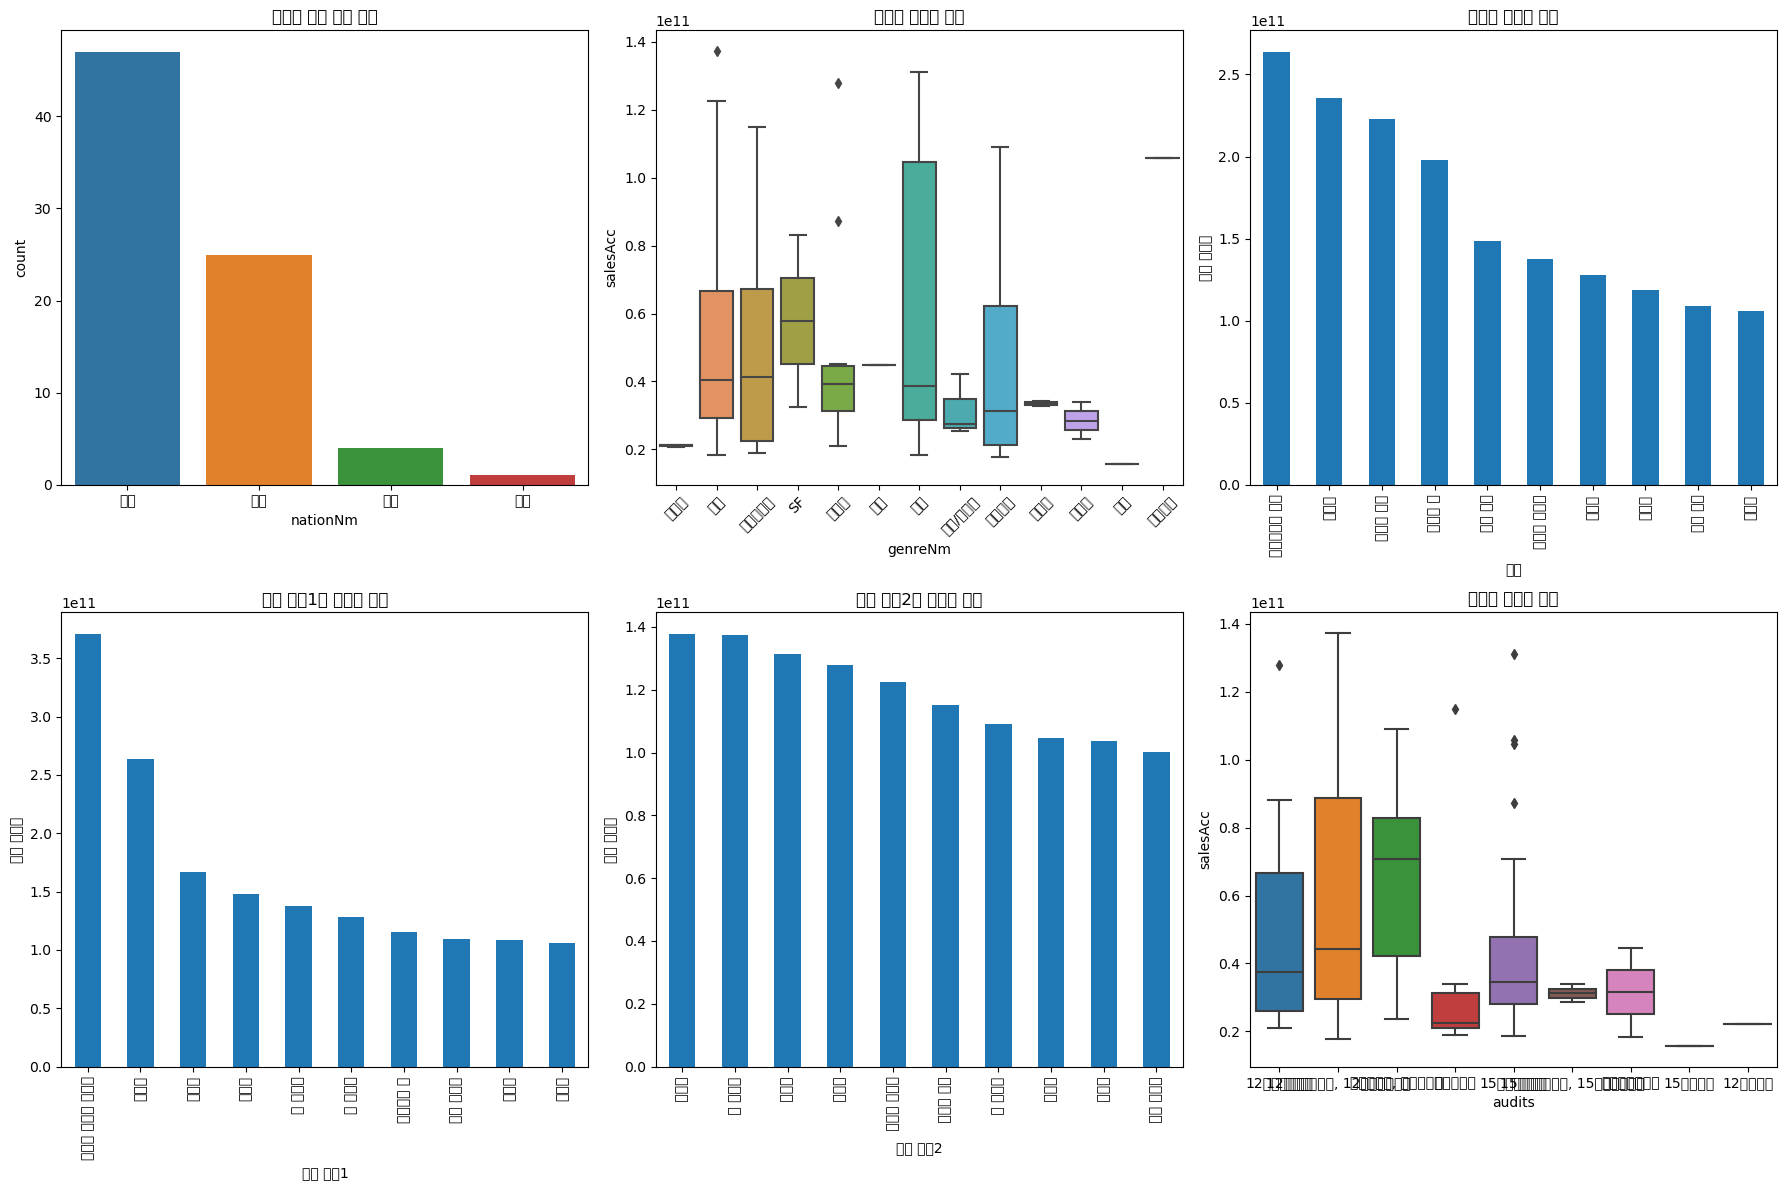

In [106]:
visualize_movie_data(movie_200_info)

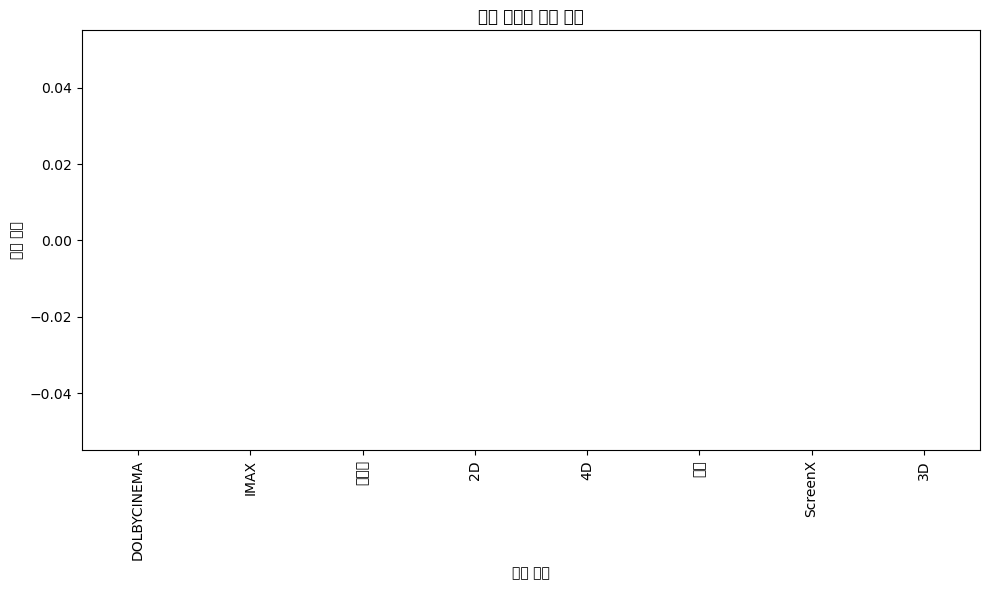

In [107]:
visualize_show_type_count(movie_200_info)

##### 3.4. 구간별 기간별 영화 개수 비율

In [108]:
# 'period'가 'p'인 데이터프레임
df_p = df[df['period'] == 'p']

# 'period'가 'r'인 데이터프레임
df_r = df[df['period'] == 'r']

# 'period'가 's'인 데이터프레임
df_s = df[df['period'] == 's']

In [109]:
# 각 구간에 속하는 영화 개수를 출력
def print_movie_counts(df, period):
    print(f"# period가 '{period}'인 데이터프레임에서의 영화 개수")
    
    # 100만 이하
    df_100_under = df[df['audiAcc'] <= 1000000]
    count_100_under = len(df_100_under['movieNm'].unique())
    print("100만 이하인 영화 수:", count_100_under)

    # 100만 이상 200만 미만
    df_100_200 = df[(df['audiAcc'] >= 1000000) & (df['audiAcc'] < 2000000)]
    count_100_200 = len(df_100_200['movieNm'].unique())
    print("100만 이상 200만 미만인 영화 수:", count_100_200)

    # 200만 이상 300만 미만
    df_200_300 = df[(df['audiAcc'] >= 2000000) & (df['audiAcc'] < 3000000)]
    count_200_300 = len(df_200_300['movieNm'].unique())
    print("200만 이상 300만 미만인 영화 수:", count_200_300)

    # 300만 이상
    df_300_over = df[df['audiAcc'] >= 3000000]
    count_300_over = len(df_300_over['movieNm'].unique())
    print("300만 이상인 영화 수:", count_300_over)

print_movie_counts(df_p, 'p')
print_movie_counts(df_r, 'r')
print_movie_counts(df_s, 's')


# period가 'p'인 데이터프레임에서의 영화 개수
100만 이하인 영화 수: 595
100만 이상 200만 미만인 영화 수: 30
200만 이상 300만 미만인 영화 수: 11
300만 이상인 영화 수: 5
# period가 'r'인 데이터프레임에서의 영화 개수
100만 이하인 영화 수: 440
100만 이상 200만 미만인 영화 수: 52
200만 이상 300만 미만인 영화 수: 30
300만 이상인 영화 수: 22
# period가 's'인 데이터프레임에서의 영화 개수
100만 이하인 영화 수: 1266
100만 이상 200만 미만인 영화 수: 257
200만 이상 300만 미만인 영화 수: 159
300만 이상인 영화 수: 102


| 기간 | 100만 이하인 영화 (%) | 100만 이상 200만 미만인 영화 (%) | 200만 이상 300만 미만인 영화 (%) | 300만 이상인 영화 (%) |
|-----|-----------------------|----------------------------------|----------------------------------|----------------------|
| s   | 70.99                 | 14.41                            | 8.92                             | 5.71                 |
| p   | 92.83                 | 4.68                             | 1.72                             | 0.78                 |
| r   | 80.88                 | 9.56                             | 5.51                             | 4.04                 |


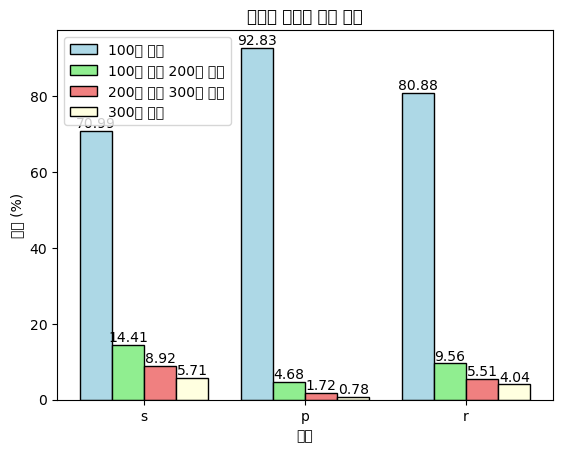

In [110]:
# 주어진 데이터
data = {
    '기간': ['s', 'p', 'r'],
    '100만 이하인 영화 (%)': [70.99, 92.83, 80.88],
    '100만 이상 200만 미만인 영화 (%)': [14.41, 4.68, 9.56],
    '200만 이상 300만 미만인 영화 (%)': [8.92, 1.72, 5.51],
    '300만 이상인 영화 (%)': [5.71, 0.78, 4.04]
}

# 전치된 데이터 생성
transposed_data = {
    '영화 구간': data['기간'],
    's': data['100만 이하인 영화 (%)'],
    'p': data['100만 이상 200만 미만인 영화 (%)'],
    'r': data['200만 이상 300만 미만인 영화 (%)'],
    '': data['300만 이상인 영화 (%)']
}

# 그래프 설정
bar_width = 0.2
index = np.arange(len(transposed_data['영화 구간']))

# 그래프 생성
plt.bar(index, transposed_data['s'], bar_width, label='100만 이하', color='lightblue', edgecolor='black')
plt.bar(index + bar_width, transposed_data['p'], bar_width, label='100만 이상 200만 미만', color='lightgreen', edgecolor='black')
plt.bar(index + bar_width * 2, transposed_data['r'], bar_width, label='200만 이상 300만 미만', color='lightcoral', edgecolor='black')
plt.bar(index + bar_width * 3, transposed_data[''], bar_width, label='300만 이상', color='lightyellow', edgecolor='black')

# 축 레이블 추가
plt.xlabel('기간')
plt.ylabel('비율 (%)')
plt.xticks(index + bar_width * 1.5, transposed_data['영화 구간'])

# 막대에 레이블 값 표시
for i in range(len(transposed_data['영화 구간'])):
    for j, value in enumerate([transposed_data[key][i] for key in transposed_data.keys() if key != '영화 구간']):
        plt.text(i + bar_width * j, value, str(round(value, 2)), ha='center', va='bottom')

# 범례 추가
plt.legend()

# 그래프 제목
plt.title('기간별 관객수 영화 비율')

# 그래프 표시
plt.show()


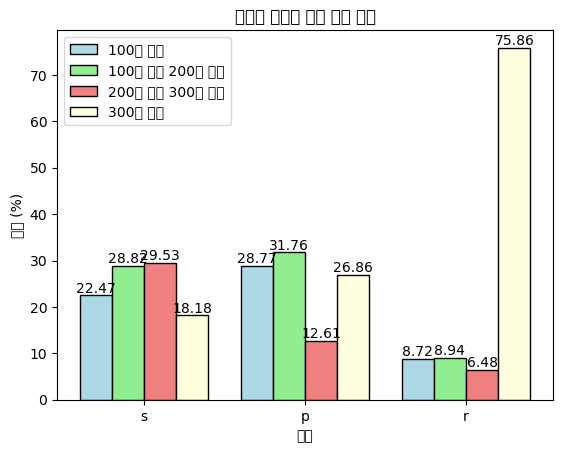

In [111]:
# calculate_sales_by_range_and_period 함수 정의
def calculate_sales_by_range_and_period(df, period):
    # 해당 기간에 해당하는 데이터프레임 추출
    period_df = df[df['period'] == period]

    # 각 구간에 해당하는 영화의 매출액 계산
    sales_100_under = period_df[period_df['audiAcc'] <= 1000000]['salesAcc'].sum()
    sales_100_200 = period_df[(period_df['audiAcc'] > 1000000) & (period_df['audiAcc'] < 2000000)]['salesAcc'].sum()
    sales_200_300 = period_df[(period_df['audiAcc'] >= 2000000) & (period_df['audiAcc'] < 3000000)]['salesAcc'].sum()
    sales_300_over = period_df[period_df['audiAcc'] >= 3000000]['salesAcc'].sum()

    # 결과를 딕셔너리로 반환
    return {
        '100만 이하인 영화': sales_100_under,
        '100만 이상 200만 미만인 영화': sales_100_200,
        '200만 이상 300만 미만인 영화': sales_200_300,
        '300만 이상인 영화': sales_300_over
    }

# 각 기간 안에서 구간별로 영화의 매출액 계산
sales_by_range_and_period = {
    'p': calculate_sales_by_range_and_period(df, 'p'),
    'r': calculate_sales_by_range_and_period(df, 'r'),
    's': calculate_sales_by_range_and_period(df, 's')
}

# 주어진 데이터
data = {
    '기간': ['s', 'p', 'r'],
    '100만 이하인 영화 (%)': [22.47, 28.77, 8.72],
    '100만 이상 200만 미만인 영화 (%)': [28.82, 31.76, 8.94],
    '200만 이상 300만 미만인 영화 (%)': [29.53, 12.61, 6.48],
    '300만 이상인 영화 (%)': [18.18, 26.86, 75.86]
}


# 전치된 데이터 생성
transposed_data = {
    '기간': data['기간'],
    '100만 이하인 영화': data['100만 이하인 영화 (%)'],
    '100만 이상 200만 미만인 영화': data['100만 이상 200만 미만인 영화 (%)'],
    '200만 이상 300만 미만인 영화': data['200만 이상 300만 미만인 영화 (%)'],
    '300만 이상인 영화': data['300만 이상인 영화 (%)']
}

# 그래프 설정
bar_width = 0.2
index = np.arange(len(transposed_data['기간']))

# 그래프 생성
plt.bar(index, transposed_data['100만 이하인 영화'], bar_width, label='100만 이하', color='lightblue', edgecolor='black')
plt.bar(index + bar_width, transposed_data['100만 이상 200만 미만인 영화'], bar_width, label='100만 이상 200만 미만', color='lightgreen', edgecolor='black')
plt.bar(index + bar_width * 2, transposed_data['200만 이상 300만 미만인 영화'], bar_width, label='200만 이상 300만 미만', color='lightcoral', edgecolor='black')
plt.bar(index + bar_width * 3, transposed_data['300만 이상인 영화'], bar_width, label='300만 이상', color='lightyellow', edgecolor='black')

# 축 레이블 추가
plt.xlabel('기간')
plt.ylabel('비율 (%)')
plt.xticks(index + bar_width * 1.5, transposed_data['기간'])

# 막대에 레이블 값 표시
for i in range(len(transposed_data['기간'])):
    for j, value in enumerate([transposed_data[key][i] for key in transposed_data.keys() if key != '기간']):
        plt.text(i + bar_width * j, value, str(round(value, 2)), ha='center', va='bottom')

# 범례 추가
plt.legend()

# 그래프 제목
plt.title('기간별 관객수 구간 매출 비율')

# 그래프 표시
plt.show()


#### 4. 기간별 개봉 후 n주차 관객수 변화

In [112]:
def plot_histograms_audiAmt_week(df):
    # 선택할 컬럼 범위 지정
    columns_to_plot = df.columns[11:]  # 11번째 컬럼부터 선택
    
    # 한 그래프에 히스토그램 그리기
    plt.figure(figsize=(10, 8))
    for column in columns_to_plot:
        sns.histplot(df[column], kde=False, alpha=0.5, bins=20, label=column)

    plt.title('Distribution of AudiAmt over 1 to 8')
    plt.xlabel('AudiAcc')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_weekly_audiAmt(df,period):
    # 플롯 설정
    plt.figure(figsize=(20,6))

    # 각 행에 대해 색깔을 다르게 하여 그래프 그리기
    for idx, row in df.iterrows():
        plt.plot(range(1, 9), row[11:]) # label=row['movieNm']

    # 축 및 타이틀 설정
    plt.xlabel('Weeks')
    plt.ylabel('AudiAmt')
    plt.title(f'{period} Weekly AudiAmt for Movies')
    plt.legend()
    #lt.grid(True)
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


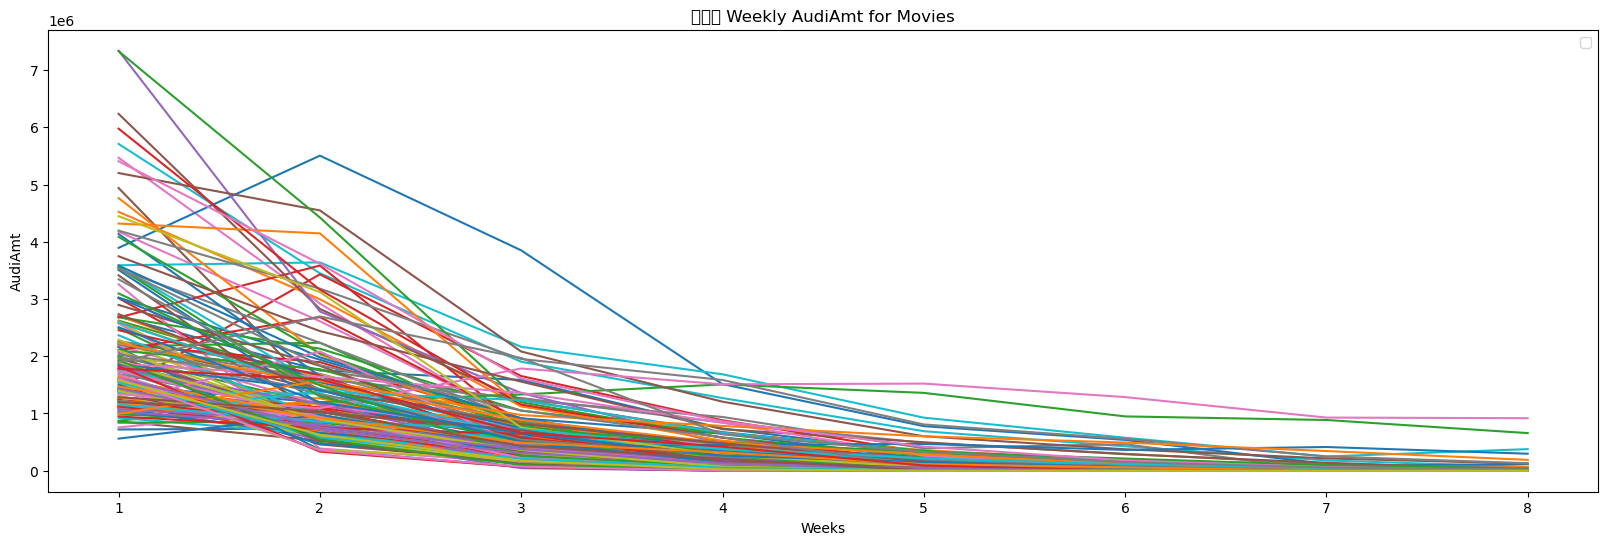

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


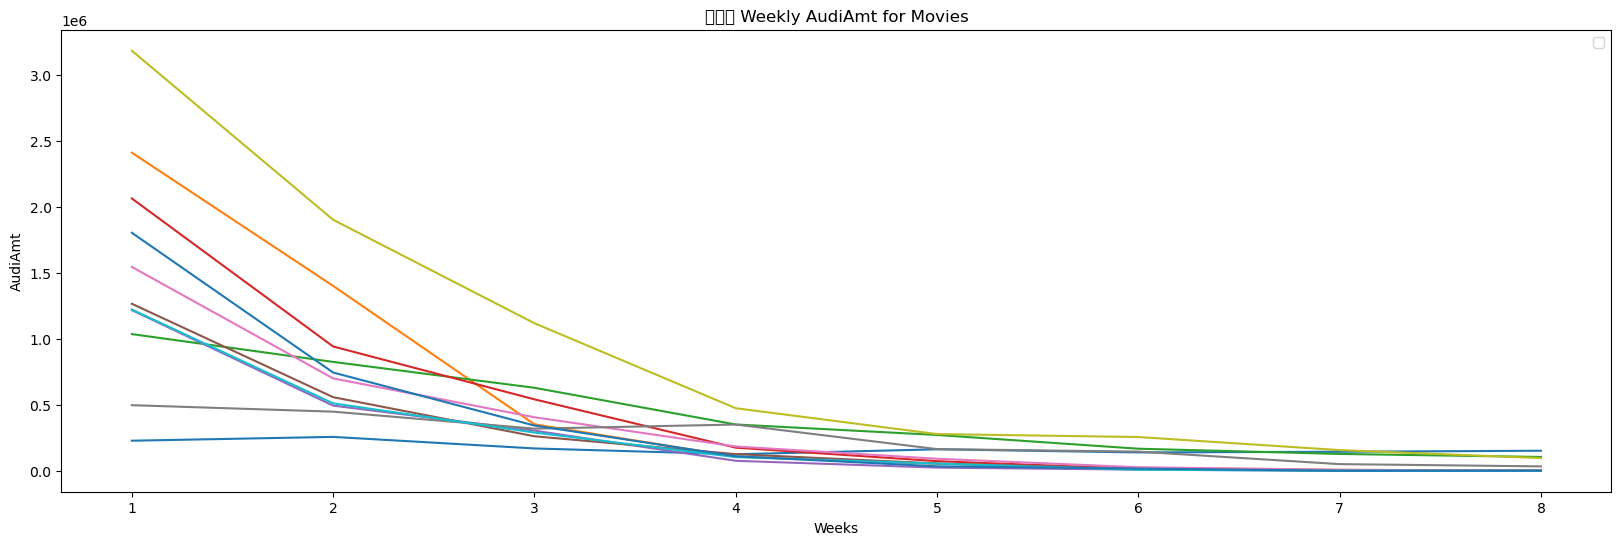

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


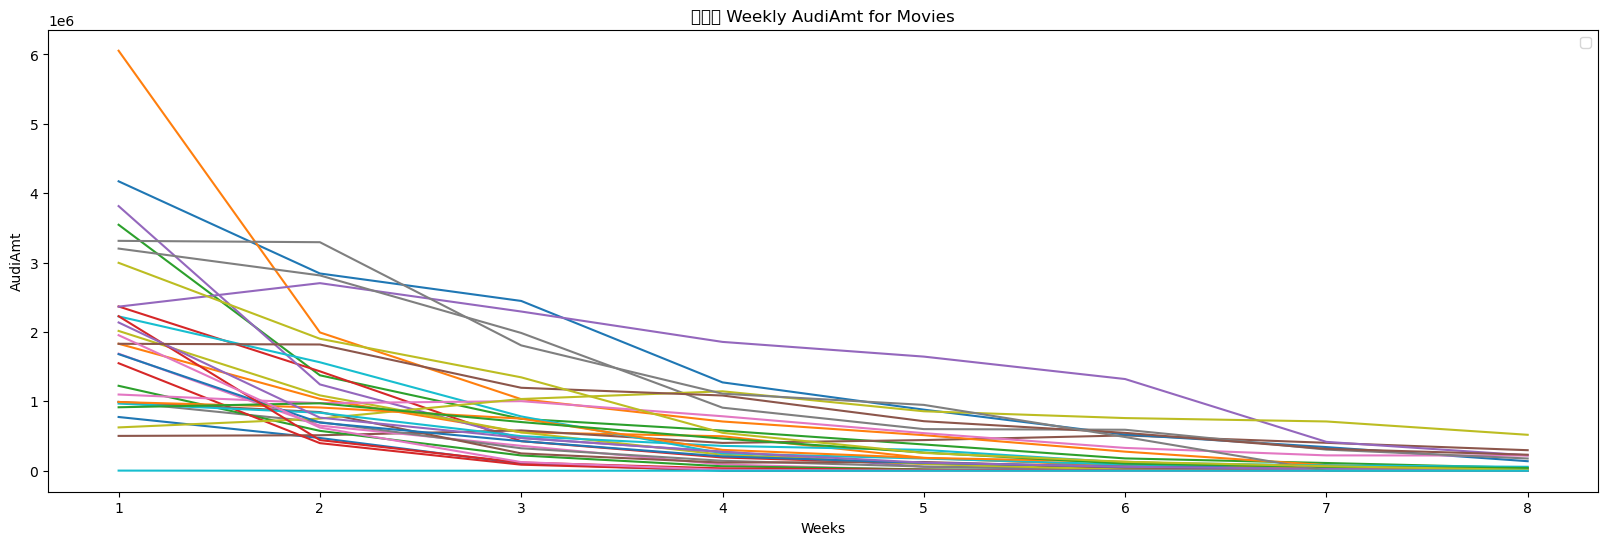

In [113]:
plot_weekly_audiAmt(audi_movies_s , '정체기')
plot_weekly_audiAmt(audi_movies_p , '팬데믹')
plot_weekly_audiAmt(audi_movies_r , '회복기')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


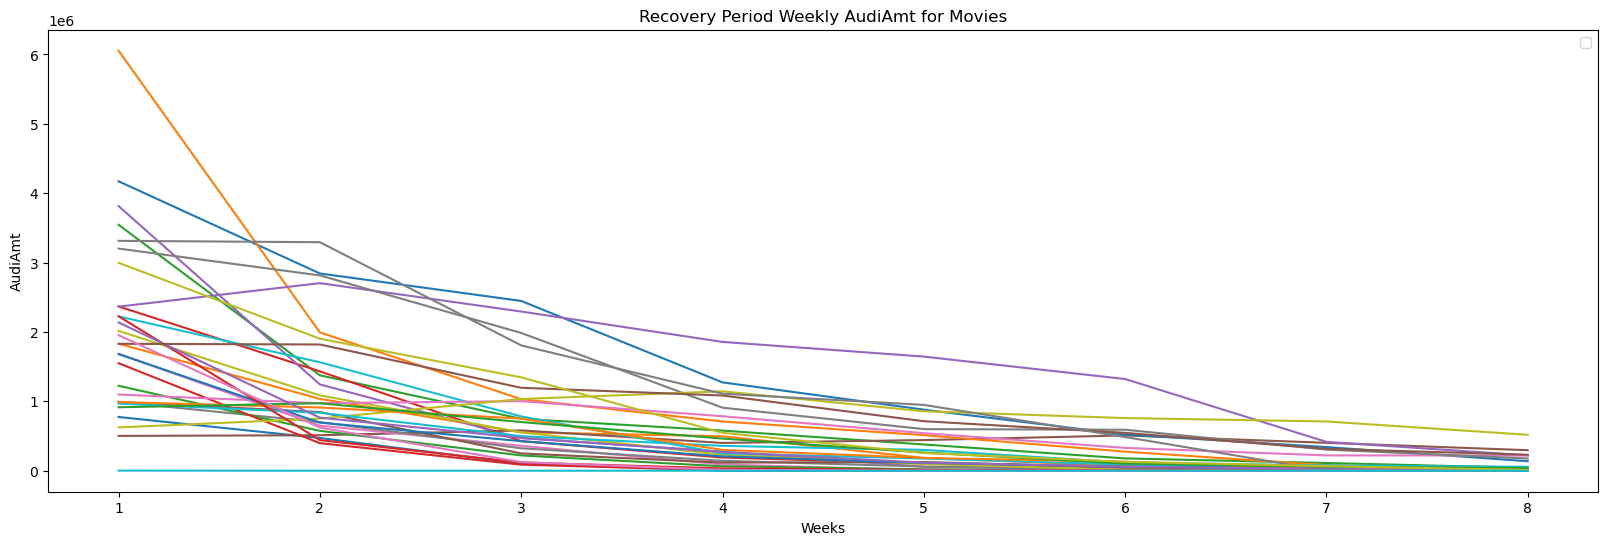

In [114]:
plot_weekly_audiAmt(audi_movies_r , 'Recovery Period')

In [123]:
audi_movies_s

,movieNm,openDt,audiAcc,1_weeks_audiAcc,2_weeks_audiAcc,3_weeks_audiAcc,4_weeks_audiAcc,5_weeks_audiAcc,6_weeks_audiAcc,7_weeks_audiAcc,8_weeks_audiAcc,1_weeks_audiAmt,2_weeks_audiAmt,3_weeks_audiAmt,4_weeks_audiAmt,5_weeks_audiAmt,6_weeks_audiAmt,7_weeks_audiAmt,8_weeks_audiAmt,total_audiAmt
14,1987,2017-12-27,7201087,2690793.0,4445061.0,6032180.0,6770007.0,7078529.0,7191677.0,7201087.0,7201087.0,2690793.0,1754268.0,1587119.0,737827.0,308522.0,113148.0,9410.0,0.0,7201087.0
43,82년생 김지영,2019-10-23,3671152,1410897.0,2675093.0,3264663.0,3536710.0,3641846.0,3671152.0,3671152.0,3671152.0,1410897.0,1264196.0,589570.0,272047.0,105136.0,29306.0,0.0,0.0,3671152.0
68,가디언즈 오브 갤럭시 VOL. 2,2017-05-03,2728692,2009286.0,2495390.0,2690497.0,2728692.0,2728692.0,2728692.0,2728692.0,2728692.0,2009286.0,486104.0,195107.0,38195.0,0.0,0.0,0.0,0.0,2728692.0
75,가장 보통의 연애,2019-10-02,2920307,1288953.0,2171641.0,2613495.0,2830895.0,2897140.0,2920307.0,2920307.0,2920307.0,1288953.0,882688.0,441854.0,217400.0,66245.0,23167.0,0.0,0.0,2920307.0
83,강남 1970,2015-01-21,2172480,1192642.0,1865834.0,2122610.0,2172480.0,2172480.0,2172480.0,2172480.0,2172480.0,1192642.0,673192.0,256776.0,49870.0,0.0,0.0,0.0,0.0,2172480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,프리즌,2017-03-23,2929585,1619570.0,2378417.0,2756432.0,2885653.0,2929585.0,2929585.0,2929585.0,2929585.0,1619570.0,758847.0,378015.0,129221.0,43932.0,0.0,0.0,0.0,2929585.0
2397,형,2016-11-23,2970583,1285809.0,2321198.0,2755156.0,2962728.0,2970583.0,2970583.0,2970583.0,2970583.0,1285809.0,1035389.0,433958.0,207572.0,7855.0,0.0,0.0,0.0,2970583.0
2411,혹성탈출: 종의 전쟁,2017-08-15,2040132,1612054.0,1968158.0,2040132.0,2040132.0,2040132.0,2040132.0,2040132.0,2040132.0,1612054.0,356104.0,71974.0,0.0,0.0,0.0,0.0,0.0,2040132.0
2427,히말라야,2015-12-16,7755848,1896771.0,4592391.0,6561475.0,7197943.0,7526389.0,7677840.0,7733373.0,7752051.0,1896771.0,2695620.0,1969084.0,636468.0,328446.0,151451.0,55533.0,18678.0,7752051.0


In [130]:
audi_movies_p

,movieNm,openDt,audiAcc,1_weeks_audiAcc,2_weeks_audiAcc,3_weeks_audiAcc,4_weeks_audiAcc,5_weeks_audiAcc,6_weeks_audiAcc,7_weeks_audiAcc,8_weeks_audiAcc,1_weeks_audiAmt,2_weeks_audiAmt,3_weeks_audiAmt,4_weeks_audiAmt,5_weeks_audiAmt,6_weeks_audiAmt,7_weeks_audiAmt,8_weeks_audiAmt
230,극장판 귀멸의 칼날: 무한열차편,2021-01-27,2188660,227420.0,483761.0,652656.0,777345.0,939655.0,1078216.0,1221877.0,1373362.0,227420.0,256341.0,168895.0,124689.0,162310.0,138561.0,143661.0,151485.0
462,다만 악에서 구하소서,2020-08-05,4353414,2410447.0,3810985.0,4162960.0,4269513.0,4322387.0,4344653.0,4351534.0,4353414.0,2410447.0,1400538.0,351975.0,106553.0,52874.0,22266.0,6881.0,1880.0
871,모가디슈,2021-07-28,3611510,1035311.0,1859936.0,2488443.0,2838839.0,3109806.0,3276525.0,3403721.0,3507949.0,1035311.0,824625.0,628507.0,350396.0,270967.0,166719.0,127196.0,104228.0
998,반도,2020-07-15,3810397,2063018.0,3004485.0,3545510.0,3720230.0,3792824.0,3806288.0,3810397.0,3810397.0,2063018.0,941467.0,541025.0,174720.0,72594.0,13464.0,4109.0,0.0
1051,베놈 2: 렛 데어 비 카니지,2021-10-13,2121625,1217542.0,1710840.0,2014754.0,2089855.0,2113435.0,2121625.0,2121625.0,2121625.0,1217542.0,493298.0,303914.0,75101.0,23580.0,8190.0,0.0,0.0
1100,분노의 질주: 더 얼티메이트,2021-05-19,2290975,1265188.0,1822552.0,2083542.0,2209213.0,2264032.0,2279129.0,2279129.0,2279129.0,1265188.0,557364.0,260990.0,125671.0,54819.0,15097.0,0.0,0.0
1127,블랙 위도우,2021-07-07,2957005,1544235.0,2243847.0,2649175.0,2832854.0,2923684.0,2949914.0,2957005.0,2957005.0,1544235.0,699612.0,405328.0,183679.0,90830.0,26230.0,7091.0,0.0
1292,소울,2021-01-20,2037876,496734.0,944359.0,1263217.0,1613220.0,1776911.0,1921821.0,1971821.0,2004739.0,496734.0,447625.0,318858.0,350003.0,163691.0,144910.0,50000.0,32918.0
1360,스파이더맨: 노 웨이 홈,2021-12-15,7545831,3182857.0,5084729.0,6202428.0,6676122.0,6953784.0,7209229.0,7365432.0,7461283.0,3182857.0,1901872.0,1117699.0,473694.0,277662.0,255445.0,156203.0,95851.0
1432,싱크홀,2021-08-11,2194102,1221307.0,1731693.0,2021033.0,2124152.0,2178215.0,2185815.0,2185815.0,2185815.0,1221307.0,510386.0,289340.0,103119.0,54063.0,7600.0,0.0,0.0


In [133]:
# 1주차부터 8주차까지의 `audiAmt` 값을 모두 더한 새로운 열 추가
sums_s = audi_movies_s.loc[:, '1_weeks_audiAmt':'8_weeks_audiAmt'].sum()

In [140]:
total_sum = sums_s.sum()
ratios = sums_s / total_sum

# 결과 출력
print("주차별 합계:")
print(sums_s)
print("\n주차별 비율:")
print(ratios)

주차별 합계:
1_weeks_audiAmt    350114557.0
2_weeks_audiAmt    215073884.0
3_weeks_audiAmt    101140798.0
4_weeks_audiAmt     47847904.0
5_weeks_audiAmt     20764122.0
6_weeks_audiAmt     10305824.0
7_weeks_audiAmt      4870186.0
8_weeks_audiAmt      3184813.0
dtype: float64

주차별 비율:
1_weeks_audiAmt    0.464773
2_weeks_audiAmt    0.285508
3_weeks_audiAmt    0.134263
4_weeks_audiAmt    0.063518
5_weeks_audiAmt    0.027564
6_weeks_audiAmt    0.013681
7_weeks_audiAmt    0.006465
8_weeks_audiAmt    0.004228
dtype: float64


In [141]:
sums_p = audi_movies_p.loc[:, '1_weeks_audiAmt':'8_weeks_audiAmt'].sum()
total_sum = sums_p.sum()
ratios = sums_p / total_sum

# 결과 출력
print("주차별 합계:")
print(sums_p)
print("\n주차별 비율:")
print(ratios)

주차별 합계:
1_weeks_audiAmt    16467126.0
2_weeks_audiAmt     8777177.0
3_weeks_audiAmt     4728943.0
4_weeks_audiAmt     2177306.0
5_weeks_audiAmt     1256711.0
6_weeks_audiAmt      814568.0
7_weeks_audiAmt      495141.0
8_weeks_audiAmt      386362.0
dtype: float64

주차별 비율:
1_weeks_audiAmt    0.469104
2_weeks_audiAmt    0.250038
3_weeks_audiAmt    0.134715
4_weeks_audiAmt    0.062026
5_weeks_audiAmt    0.035800
6_weeks_audiAmt    0.023205
7_weeks_audiAmt    0.014105
8_weeks_audiAmt    0.011006
dtype: float64


In [142]:
sums_r = audi_movies_r.loc[:, '1_weeks_audiAmt':'8_weeks_audiAmt'].sum()
total_sum = sums_r.sum()
ratios = sums_r / total_sum

# 결과 출력
print("주차별 합계:")
print(sums_r)
print("\n주차별 비율:")
print(ratios)

주차별 합계:
1_weeks_audiAmt    60035057.0
2_weeks_audiAmt    36219383.0
3_weeks_audiAmt    22690479.0
4_weeks_audiAmt    13909294.0
5_weeks_audiAmt     9607228.0
6_weeks_audiAmt     6408442.0
7_weeks_audiAmt     3309370.0
8_weeks_audiAmt     2020378.0
dtype: float64

주차별 비율:
1_weeks_audiAmt    0.389333
2_weeks_audiAmt    0.234886
3_weeks_audiAmt    0.147150
4_weeks_audiAmt    0.090203
5_weeks_audiAmt    0.062304
6_weeks_audiAmt    0.041559
7_weeks_audiAmt    0.021462
8_weeks_audiAmt    0.013102
dtype: float64


In [145]:
audi_movies_r

,movieNm,openDt,audiAcc,1_weeks_audiAcc,2_weeks_audiAcc,3_weeks_audiAcc,4_weeks_audiAcc,5_weeks_audiAcc,6_weeks_audiAcc,7_weeks_audiAcc,8_weeks_audiAcc,1_weeks_audiAmt,2_weeks_audiAmt,3_weeks_audiAmt,4_weeks_audiAmt,5_weeks_audiAmt,6_weeks_audiAmt,7_weeks_audiAmt,8_weeks_audiAmt
23,30일,2023-10-03,2163199,774293.0,1245935.0,1348736.0,1348736.0,1348736.0,1348736.0,1348736.0,1348736.0,774293.0,471642.0,102801.0,0.0,0.0,0.0,0.0,0.0
69,가디언즈 오브 갤럭시: Volume 3,2023-05-03,4204834,1830021.0,2865319.0,3418710.0,3915689.0,4100656.0,4167320.0,4195163.0,4204834.0,1830021.0,1035298.0,553391.0,496979.0,184967.0,66664.0,27843.0,9671.0
151,공조2: 인터내셔날,2022-09-07,6979189,3544785.0,4919914.0,5668137.0,6246543.0,6624852.0,6802308.0,6913606.0,6955441.0,3544785.0,1375129.0,748223.0,578406.0,378309.0,177456.0,111298.0,41835.0
432,노량: 죽음의 바다,2023-12-20,4560367,2367281.0,3799840.0,4225644.0,4416334.0,4518609.0,4558003.0,4560367.0,4560367.0,2367281.0,1432559.0,425804.0,190690.0,102275.0,39394.0,2364.0,0.0
484,닥터 스트레인지: 대혼돈의 멀티버스,2022-05-04,5882489,3813804.0,5057599.0,5527520.0,5803762.0,5860402.0,5876123.0,5882489.0,5882489.0,3813804.0,1243795.0,469921.0,276242.0,56640.0,15721.0,6366.0,0.0
547,더 퍼스트 슬램덩크,2023-01-04,4865289,501862.0,1013216.0,1594208.0,1994807.0,2436498.0,2945064.0,3347235.0,3643003.0,501862.0,511354.0,580992.0,400599.0,441691.0,508566.0,402171.0,295768.0
770,마녀(魔女) Part2. The Other One,2022-06-15,2806159,1686770.0,2336539.0,2695554.0,2785819.0,2795936.0,2795936.0,2795936.0,2806159.0,1686770.0,649769.0,359015.0,90265.0,10117.0,0.0,0.0,10223.0
929,미니언즈2,2022-07-20,2263349,992433.0,1693016.0,2016635.0,2159709.0,2219581.0,2246910.0,2263349.0,2263349.0,992433.0,700583.0,323619.0,143074.0,59872.0,27329.0,16439.0,0.0
939,미션 임파서블: 데드 레코닝 PART ONE,2023-07-12,4015548,2014779.0,3100578.0,3653799.0,3884497.0,3982057.0,3997746.0,4015548.0,4015548.0,2014779.0,1085799.0,553221.0,230698.0,97560.0,15689.0,17802.0,0.0
966,밀수,2023-07-26,5123219,2224264.0,3787306.0,4569819.0,4820511.0,4996015.0,5085670.0,5119449.0,5123219.0,2224264.0,1563042.0,782513.0,250692.0,175504.0,89655.0,33779.0,3770.0


In [ ]:
audi_movies_r[audi_movies_r['movieNm'] == '파묘']

##### 4.1. 개봉 후 n주 상관계수

In [137]:
#audi_movies_p.columns

In [138]:
#audi_movies_p['audiAcc'] = audi_movies_p['audiAcc'].astype(float)

In [ ]:
def plot_correlation_heatmap(df, columns, threshold=0.5):
    # 선택된 컬럼들만 추출
    selected_df = df[columns]
    
    # 상관관계 계산
    correlation_matrix = selected_df.corr()
    
    # 임계값 이상인 상관관계 값만 선택
    strong_correlation = correlation_matrix[abs(correlation_matrix) >= threshold]
    
    # 상관관계 히트맵 그리기
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix.loc[strong_correlation.index, strong_correlation.index], annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap of Selected Columns (threshold={threshold})')
    plt.show()

# 함수 호출
columns = ['audiAcc','1_weeks_audiAmt', '2_weeks_audiAmt', '3_weeks_audiAmt',
       '4_weeks_audiAmt', '5_weeks_audiAmt', '6_weeks_audiAmt',
       '7_weeks_audiAmt', '8_weeks_audiAmt']
plot_correlation_heatmap(audi_movies_p,columns= columns, threshold=0.5)

In [ ]:
target_variable = "audiAcc"  # 타겟 변수 설정
threshold = 0.1  # 임계값 설정
features_correlation_with_target(audi_movies_s, target_variable, threshold)

target_variable = "audiAcc"  # 타겟 변수 설정
threshold = 0.1  # 임계값 설정
features_correlation_with_target(audi_movies_p, target_variable, threshold)

target_variable = "audiAcc"  # 타겟 변수 설정
threshold = 0.1  # 임계값 설정
features_correlation_with_target(audi_movies_r, target_variable, threshold)

In [ ]:
import matplotlib.pyplot as plt

# 주어진 데이터
features = ['1st Week', '2nd Week', '3rd Week', '4th Week', '5th Week', '6th Week', '7th Week', '8th Week']
correlation_stagnation = [0.793063, 0.903081, 0.860756, 0.823265, 0.716964, 0.623521, 0.716964, 0.389984]
correlation_pandemic = [0.858384, 0.963741, 0.920661, 0.632845, 0.541788, 0.567533, 0.473444, 0.264773]
correlation_recovery = [0.649322, 0.894345, 0.927217, 0.895771, 0.863027, 0.795336, 0.564598, 0.427870]

# Figure와 Axes 객체 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 선 그래프 그리기
ax.plot(features, correlation_stagnation, marker='o', linestyle='-', color='b', label='Stagnation')
ax.plot(features, correlation_pandemic, marker='o', linestyle='-', color='r', label='Pandemic')
ax.plot(features, correlation_recovery, marker='o', linestyle='-', color='g', label='Recovery')

# 그래프 제목과 레이블 설정
ax.set_title('Correlation of audiAmt during different periods')
ax.set_xlabel('Week')
ax.set_ylabel('Correlation')
ax.legend()
#ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
